**In The Name Of God**
<html>
<div>
  <span style="font-family: Poppins; font-size:30px; color: pink;"> University of Tehran <br/> Machine Learning <br/> Linear Regression and Classification <br/> CA4
</div>
<span style="font-family: Poppins; font-size:15pt; color: pink; vertical-align: middle;"> <br> Mobina Haghizadeh </span><br>
<span style="font-family: Poppins; font-size:15pt; color: pink; vertical-align: middle;"> 810100127 </span>

</html>

# Description
We have been provided with a dataset of Boston home sales prices and their associated features. Our task is to analyze the dataset using visualization and statistical tools, clean and prepare the data for machine learning tasks, and then apply linear regression and classification techniques to predict the prices of the homes.

### Constants:

In [182]:
THRESHOLD = 0.25
Ordinary = 0
Luxury = 1
Economical = 2

### Imports:

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from mlxtend.evaluate import bias_variance_decomp
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression

## First part:
Exploratory Data Analysis
1. Initially, I imported the dataset and utilized various functions to gain an overall comprehension of the information at hand.

In [184]:
dataSet = pd.read_excel("DataSet.xlsx")
originalData = pd.read_excel("DataSet.xlsx")

dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     480 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      479 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        486 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     452 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [185]:
dataSet.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,480.000000,506.000000,506.000000,506.000000,479.000000,506.000000,506.000000,506.000000,486.000000,506.000000,452.000000
mean,1.269195,13.295257,9.205158,0.175000,1.101175,15.679800,58.744660,6.211663,78.063241,339.317787,42.614980,336.820947,11.537806,23.750442
std,2.399207,23.048697,7.169630,0.380364,1.646991,27.220206,33.104049,6.527286,203.542157,180.670077,87.585243,121.174519,6.064932,8.808602
min,0.000000,0.000000,0.000000,0.000000,0.385000,3.561000,1.137000,1.129600,1.000000,20.200000,2.600000,0.320000,1.730000,6.300000
25%,0.049443,0.000000,3.440000,0.000000,0.449000,5.961500,32.000000,2.425900,4.000000,254.000000,17.000000,370.415000,6.877500,18.500000
50%,0.144655,0.000000,6.960000,0.000000,0.538000,6.322500,65.250000,3.917500,5.000000,307.000000,18.900000,390.885000,10.380000,21.950000
75%,0.819623,18.100000,18.100000,0.000000,0.647000,6.949000,89.975000,6.341400,24.000000,403.000000,20.200000,395.630000,15.015000,26.600000
max,9.966540,100.000000,27.740000,1.000000,7.313000,100.000000,100.000000,24.000000,666.000000,711.000000,396.900000,396.900000,34.410000,50.000000


2. Then I gain the number and ratio of missing (or null) data in the columns of our data.

In [186]:
def missing_values(data):
    missingValuesCount = data.isnull().sum()
    missingValuesRatio = (missingValuesCount / len(data)) * 100

    missingDataStats = pd.DataFrame({
        'Missing Values Count' : missingValuesCount,
        'Missing Values Ratio' : missingValuesRatio
    })
    return missingDataStats

In [187]:
missing_values(dataSet)

,Missing Values Count,Missing Values Ratio
CRIM,0,0.000000
ZN,0,0.000000
INDUS,0,0.000000
CHAS,26,5.138340
NOX,0,0.000000
RM,0,0.000000
AGE,0,0.000000
DIS,27,5.335968
RAD,0,0.000000
TAX,0,0.000000


3. Then I plot the number of unique values for each attribute in our data.

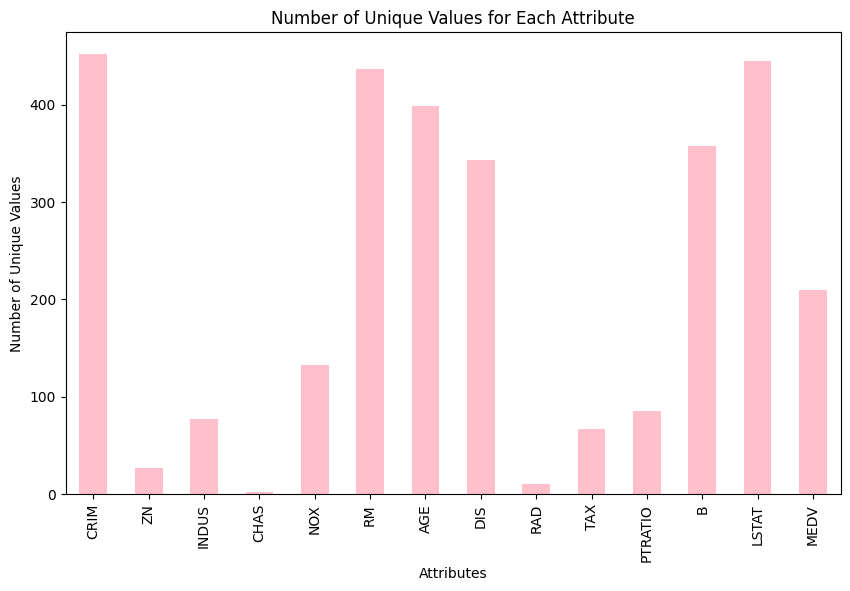

In [188]:
uniqueCounts = dataSet.nunique()

plt.figure(figsize=(10, 6))
uniqueCounts.plot(kind = 'bar', color='pink')
plt.xlabel('Attributes')
plt.ylabel('Number of Unique Values')
plt.title('Number of Unique Values for Each Attribute')
plt.xticks(rotation=90) 
plt.show()

In [189]:
uniqueCounts

CRIM       452
ZN          27
INDUS       77
CHAS         2
NOX        132
RM         437
AGE        399
DIS        343
RAD         10
TAX         67
PTRATIO     85
B          357
LSTAT      445
MEDV       210
dtype: int64

As we can see in the plot, the attribute "CRIM" has the highest number of unique values, while the attribute "CHAS" has the lowest number of unique values.

Subsequently, I examined the number of distinct values present in each of those selected features. Having a large number of unique values can pose challenges in classification tasks as it may lead to overfitting. Overfitting occurs when a model becomes overly complex and tries to memorize each individual data point, resulting in poor generalization to unseen data. To mitigate this issue, it is often necessary to address high-dimensional or highly granular features with a large number of unique values through techniques such as feature selection, dimensionality reduction, or data preprocessing.

4. Using the .corr() function in Pandas, I computed the correlation matrix among the features and visualized it using a heatmap. The correlation values range from -1 to 1. A negative correlation indicates that as one feature increases, the other feature tends to decrease. Conversely, a positive correlation suggests that as one feature increases, the other feature tends to increase as well. When the correlation value is close to 0, it indicates a weak linear relationship between the features.

<Axes: >

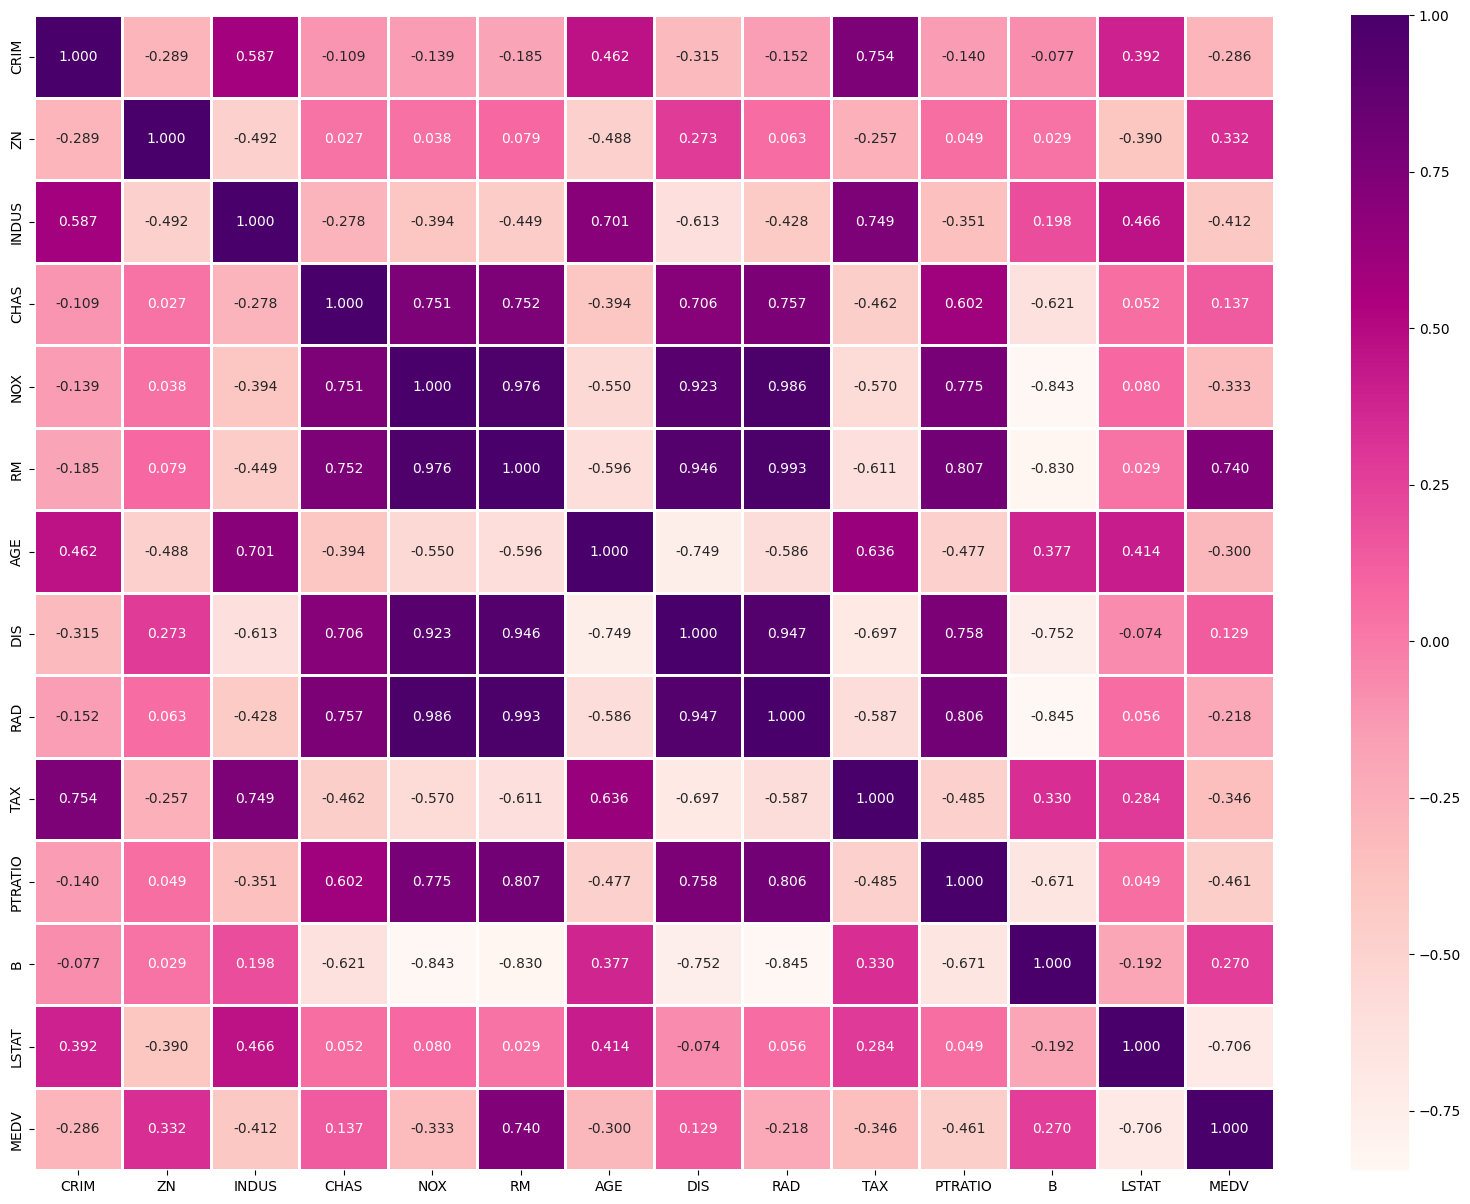

In [190]:
corrMatrix = dataSet.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corrMatrix, annot=True, fmt=".3f", linewidths=1, cmap="RdPu")

Then I plot histograms for each feature in the dataset, showing the distribution of values for features that are correlated with the "MEDV" column.

In [191]:
MEDVcorr = corrMatrix["MEDV"].drop("MEDV")
MEDVcorr

CRIM      -0.286245
ZN         0.331570
INDUS     -0.411915
CHAS       0.136668
NOX       -0.332778
RM         0.740181
AGE       -0.299893
DIS        0.129355
RAD       -0.217902
TAX       -0.345898
PTRATIO   -0.461214
B          0.269605
LSTAT     -0.706255
Name: MEDV, dtype: float64

In [192]:
dataSet[MEDVcorr.index].nunique()

CRIM       452
ZN          27
INDUS       77
CHAS         2
NOX        132
RM         437
AGE        399
DIS        343
RAD         10
TAX         67
PTRATIO     85
B          357
LSTAT      445
dtype: int64

In [193]:
corrList = corrMatrix['MEDV'].drop('MEDV').sort_values(ascending=False)
dependent_to_target = corrList[abs(corrList) > THRESHOLD]
dependent_to_target

RM         0.740181
ZN         0.331570
B          0.269605
CRIM      -0.286245
AGE       -0.299893
NOX       -0.332778
TAX       -0.345898
INDUS     -0.411915
PTRATIO   -0.461214
LSTAT     -0.706255
Name: MEDV, dtype: float64

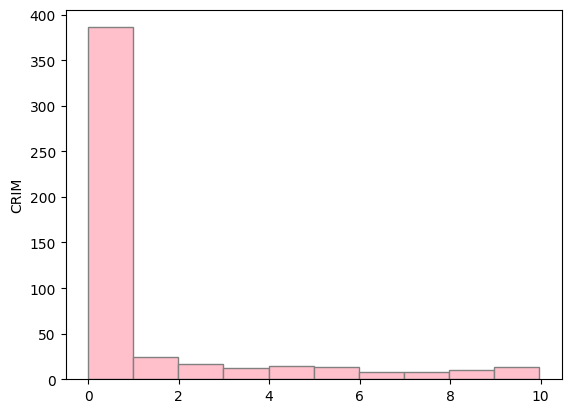

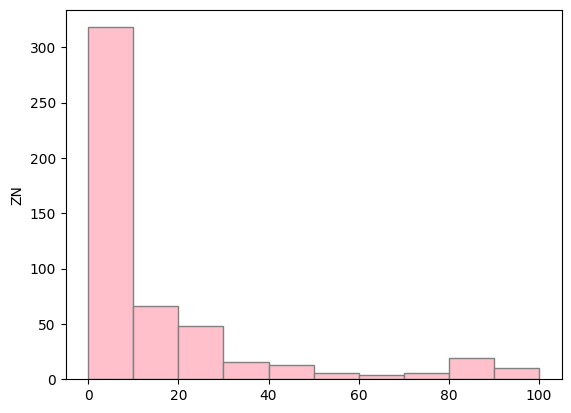

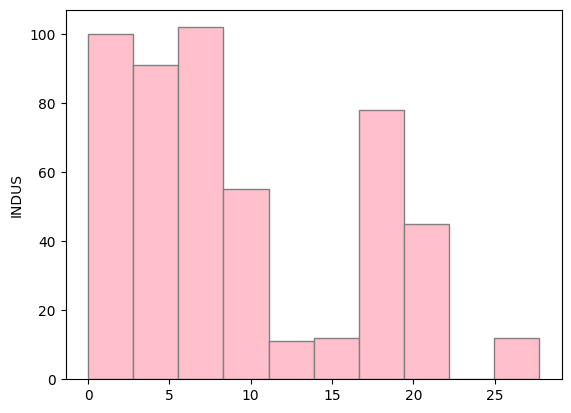

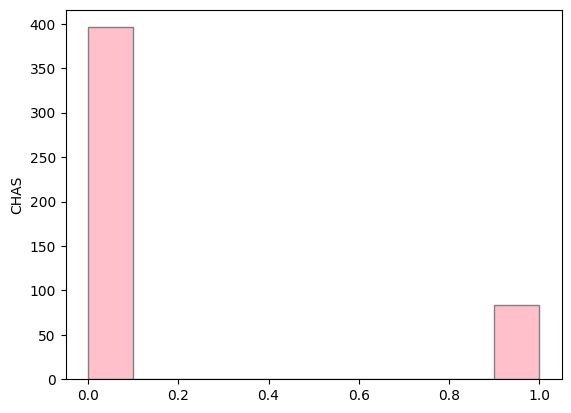

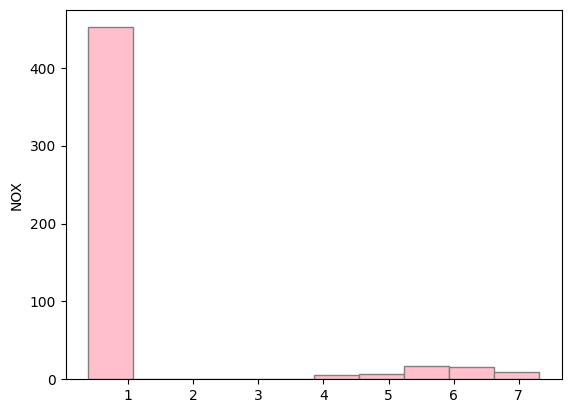

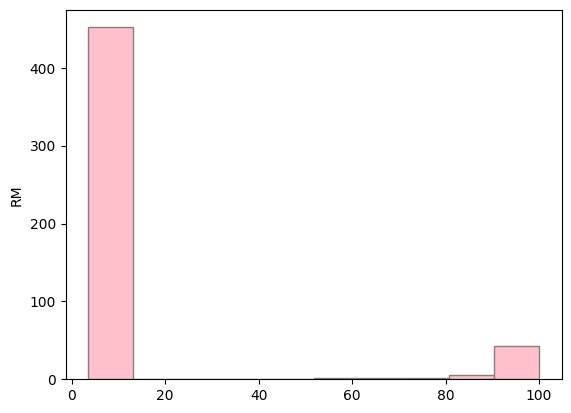

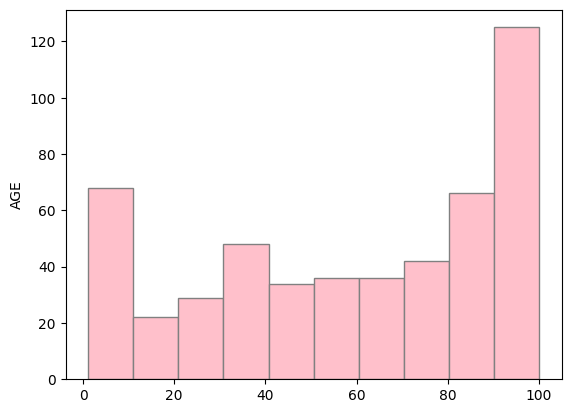

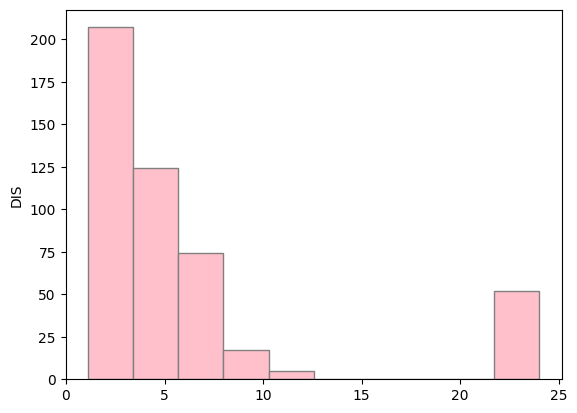

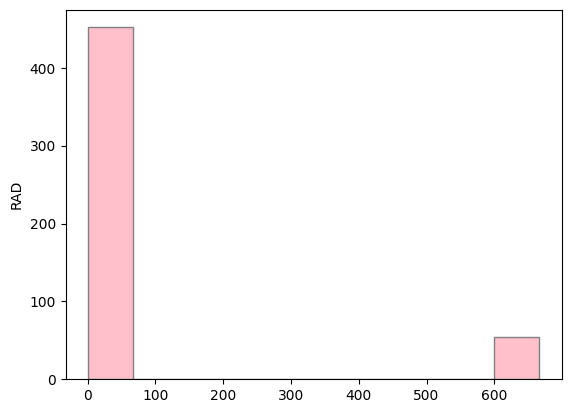

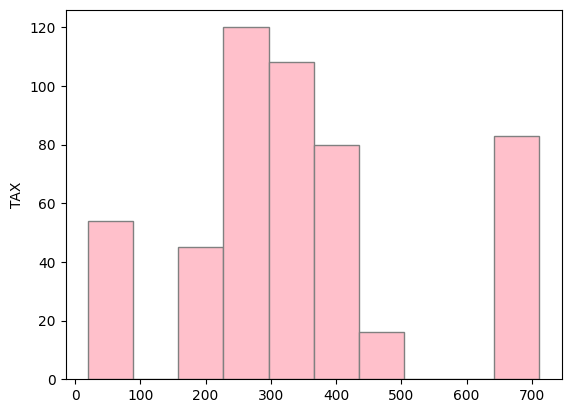

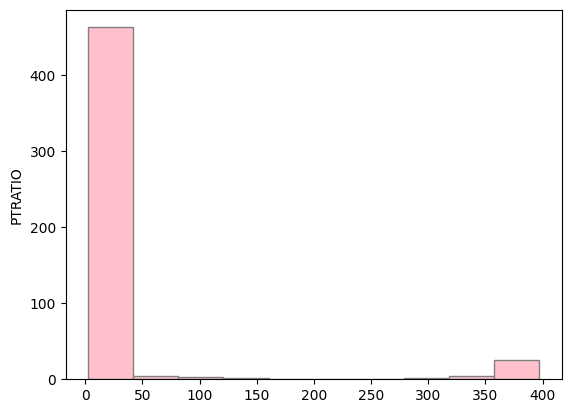

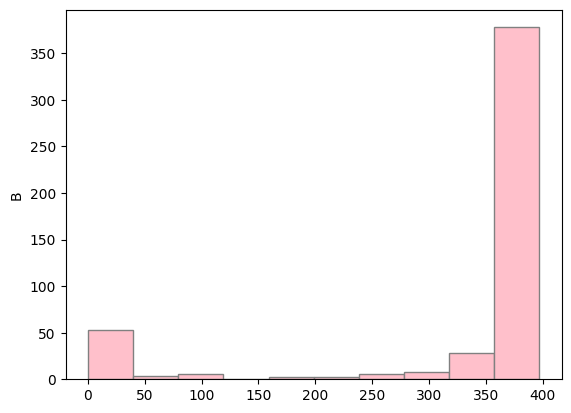

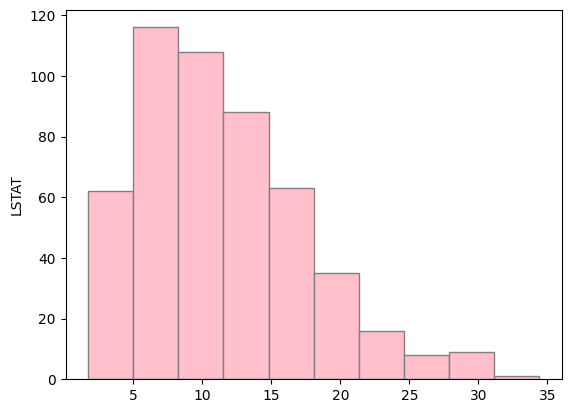

In [194]:
for feature in MEDVcorr.index:
    plt.hist(dataSet[feature], edgecolor='gray', color='pink')
    plt.ylabel(feature)
    plt.show()


5. To gain deeper insight into how these features relate to MEDV, I visually represented their correlation through hexbin and scatter plots. In scatter plots, certain continuous features, like 'RM', exhibit a discernible linear trend with MEDV. Hexbin plots, on the other hand, offer a density visualization of our dataset. For instance, they reveal clusters of data points indicating combinations such as low CHAS and low MEDV. Thus, from these hexbin plots, we can also deduce potential correlations between features and MEDV.

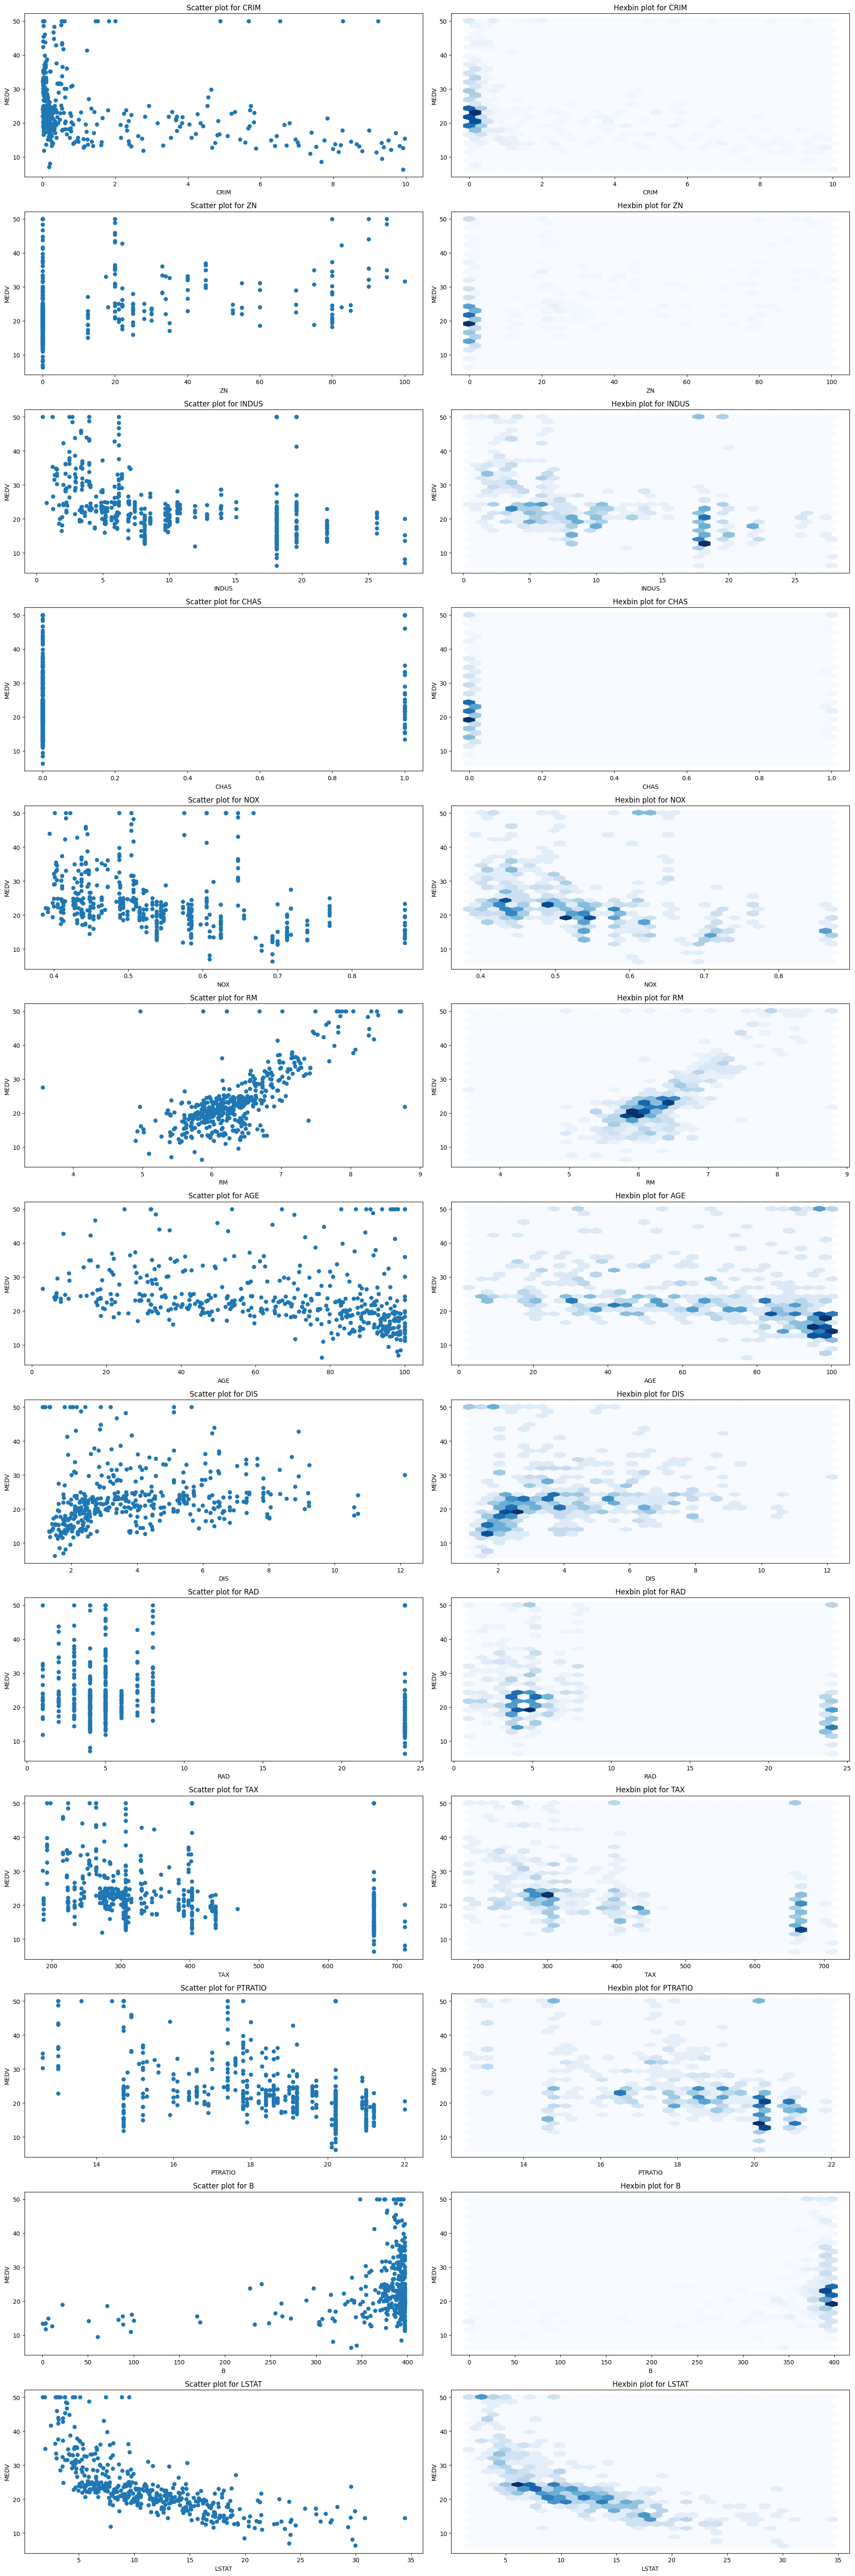

In [195]:
fig, axs = plt.subplots(nrows=len(MEDVcorr.index), ncols=2, figsize=(20, 60))

for i, feature in enumerate(MEDVcorr.index):
    axs[i, 0].scatter(dataSet[feature], dataSet["MEDV"])
    axs[i, 0].set_title(f'Scatter plot for {feature}')
    axs[i, 0].set_xlabel(feature)
    axs[i, 0].set_ylabel("MEDV")
    
    axs[i, 1].hexbin(dataSet[feature], dataSet["MEDV"], gridsize=30, cmap='Blues')
    axs[i, 1].set_title(f'Hexbin plot for {feature}')
    axs[i, 1].set_xlabel(feature)
    axs[i, 1].set_ylabel("MEDV")

plt.tight_layout()
plt.show()

- Scatter plot: A scatter plot displays individual data points as dots on a two-dimensional graph, where each dot represents a single observation. It's particularly useful for showing the relationship between two continuous variables. The position of each dot on the graph corresponds to the values of the two variables being plotted. Scatter plots help to identify patterns, trends, and the strength of the relationship between the variables. For example, a scatter plot can reveal whether there's a linear relationship, a curved relationship, or no relationship at all between the variables.

- Hexbin plot: A hexbin plot is similar to a scatter plot, but it is particularly useful when dealing with a large number of data points. Instead of representing each data point individually, hexbin plots divide the graph area into hexagonal bins. The number of data points falling into each bin is counted, and then each bin is color-coded or shaded based on the count of data points it contains. Hexbin plots are helpful for visualizing the density of data points in different regions of the plot, making it easier to identify areas of high or low concentration. They are especially useful when dealing with large datasets because they provide a clearer representation of data density compared to traditional scatter plots.

6. Data transformation involves modifying the original data to make it more suitable for analysis or modeling. One common technique for data transformation is normalization, which scales the data to a similar range. Here's an implementation and explanation of normalization as a data transformation technique:

In [196]:
X = dataSet.drop('MEDV', axis=1)  
y = dataSet['MEDV']

scaler = MinMaxScaler()  
X_scaled = scaler.fit_transform(X)  

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000634,0.18,0.083273,0.0,0.022084,0.031253,0.647998,0.129442,0.000000,0.399247,0.032209,1.000000,0.099449
1,0.002740,0.00,0.254867,0.0,0.012125,0.029656,0.786573,0.167793,0.001504,0.321077,0.038549,1.000000,0.226744
2,0.002738,0.00,0.254867,0.0,0.012125,0.037578,0.606526,0.167793,0.001504,0.321077,0.038549,0.989737,0.070379
3,0.003248,0.00,0.078587,0.0,0.010537,0.035639,0.451767,0.215676,0.003008,0.292125,0.040832,NaN,0.037026
4,0.006928,0.00,0.078587,0.0,0.010537,0.037184,0.536733,0.215676,0.003008,0.292125,0.040832,1.000000,0.110159
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.006284,0.00,0.430065,0.0,0.027136,0.031440,0.687446,0.058985,0.000000,0.365953,0.046665,0.987619,0.242962
502,0.004542,0.00,0.430065,0.0,0.027136,0.026535,0.764320,0.050629,0.000000,0.365953,0.046665,1.000000,0.224908
503,0.006096,0.00,0.430065,0.0,0.027136,0.035411,0.908965,0.045382,0.000000,0.365953,0.046665,1.000000,0.119645
504,0.010996,0.00,0.430065,0.0,0.027136,0.033524,0.891769,0.055062,0.000000,0.365953,0.046665,0.991301,0.145349


- Load dataset: Load the dataset that you want to transform.

- Separate features and target variable: Separate the features (independent variables) from the target variable (dependent variable), if applicable. Data transformation techniques typically apply to the features.

- Perform normalization: Initialize a normalization scaler object, such as MinMaxScaler, which scales the data to a specified range (e.g., between 0 and 1). Fit the scaler to the feature data (X) and transform it to obtain the normalized representation (X_scaled).

- Convert scaled data back to DataFrame : Convert the scaled data back to a DataFrame format, preserving the original column names.

# Second part: Preprocessing

## Question 7:
Handling missing values is an essential step in data preprocessing to ensure the accuracy and reliability of analysis and modeling. Here are three common methods for handling missing values along with their implementations and reasons for use:
1. Mean/Median/Mode Imputation
- Implementation: Replace missing values with the mean, median, or mode of the respective feature.
- Reason for Use: This method is suitable when the missing values are assumed to be missing completely at random (MCAR). It helps to maintain the overall distribution of the data and is simple to implement. However, it may not be appropriate for variables with outliers.

In [197]:
dataSet.fillna(dataSet.median(numeric_only=True), inplace=True)


In [198]:
missing_values(dataSet)

,Missing Values Count,Missing Values Ratio
CRIM,0,0.0
ZN,0,0.0
INDUS,0,0.0
CHAS,0,0.0
NOX,0,0.0
RM,0,0.0
AGE,0,0.0
DIS,0,0.0
RAD,0,0.0
TAX,0,0.0


2. Deletion of Missing Values:
- Implementation: Remove rows or columns with missing values from the dataset.
- Reason for Use: This method is appropriate when the missing values are limited and do not significantly affect the analysis. It ensures a clean dataset but may lead to loss of information if the missing values contain important patterns or trends.

In [199]:
missing_values(originalData)

,Missing Values Count,Missing Values Ratio
CRIM,0,0.000000
ZN,0,0.000000
INDUS,0,0.000000
CHAS,26,5.138340
NOX,0,0.000000
RM,0,0.000000
AGE,0,0.000000
DIS,27,5.335968
RAD,0,0.000000
TAX,0,0.000000


In [200]:
dataCleaned = originalData.dropna()

In [201]:
missing_values(dataCleaned)

,Missing Values Count,Missing Values Ratio
CRIM,0,0.0
ZN,0,0.0
INDUS,0,0.0
CHAS,0,0.0
NOX,0,0.0
RM,0,0.0
AGE,0,0.0
DIS,0,0.0
RAD,0,0.0
TAX,0,0.0


3. Imputation Using Predictive Models:
- Implementation: Use machine learning algorithms to predict missing values based on other features in the dataset.
- Reason for Use: This method is suitable when missing values have a systematic pattern and when deletion or simple imputation methods are not feasible. It helps to retain valuable information and can improve the performance of predictive models.

In [202]:
originalData.dropna(subset=['MEDV'], inplace=True)


X = originalData.dropna(axis=1)
y = originalData['MEDV']

model = RandomForestRegressor()
model.fit(X, y)

missingRows = originalData.isnull().any(axis=1)

dataFilledModel = originalData.copy()
dataFilledModel.loc[missingRows, 'missing_feature'] = model.predict(originalData.loc[missingRows, X.columns])
missing_values(dataFilledModel)


,Missing Values Count,Missing Values Ratio
CRIM,0,0.000000
ZN,0,0.000000
INDUS,0,0.000000
CHAS,24,5.309735
NOX,0,0.000000
RM,0,0.000000
AGE,0,0.000000
DIS,25,5.530973
RAD,0,0.000000
TAX,0,0.000000


## Question 8:
Dropping columns based on the least correlation can be a valid approach, especially when you want to simplify your dataset and focus on the most relevant features for your analysis or modeling. If certain columns have consistently low correlation with the target variable or other important features, removing them may improve model efficiency and interpretability.

In [203]:
least_correlated_columns = corrMatrix.abs().min().sort_values()
least_correlated_columns

ZN         0.027097
CHAS       0.027097
B          0.029200
RM         0.029450
LSTAT      0.029450
NOX        0.038450
PTRATIO    0.049208
RAD        0.056185
DIS        0.074013
CRIM       0.076602
MEDV       0.129355
INDUS      0.198492
TAX        0.256799
AGE        0.299893
dtype: float64

I intended to drop some columns with low correlation with the target, but all of them exceeded the threshold.

In [204]:
dataSet.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [205]:
dependent_data = dataSet[dependent_to_target.index.union(["MEDV"])]
dependent_data.columns

Index(['AGE', 'B', 'CRIM', 'INDUS', 'LSTAT', 'MEDV', 'NOX', 'PTRATIO', 'RM',
       'TAX', 'ZN'],
      dtype='object')

## Question 9:
Numerical features are those that represent quantities and can be measured or counted, typically as continuous or discrete values. Examples include age, height, temperature, and income.
Categorical features, on the other hand, represent characteristics or attributes and can take on a limited number of distinct categories or levels. These categories can be nominal (unordered) or ordinal (ordered). Examples include gender, marital status, city, and education level.

The difference between numerical and categorical features lies in their nature and the type of information they represent. Numerical features allow for mathematical operations such as addition and subtraction and can be represented on a continuous scale. Categorical features, however, represent qualitative characteristics and do not have a natural numerical interpretation. They are typically represented using labels or codes.

In [206]:
numericalFeatures = dataSet.select_dtypes(include=['int', 'float']).columns

categoricalFeatures = dataSet.select_dtypes(include=['object']).columns

print("Numerical features:")
for feature in numericalFeatures:
    print(feature)

print("\nCategorical features:")
print(categoricalFeatures)

Numerical features:
CRIM
ZN
INDUS
CHAS
NOX
RM
AGE
DIS
RAD
TAX
PTRATIO
B
LSTAT
MEDV

Categorical features:
Index([], dtype='object')


## Question 10:
**Normalization** usually refers to the rescaling of the features to a range of [0, 1], which means that the minimum value of the feature becomes 0, and the maximum value becomes 1. This is also commonly called Min-Max Scaling.

$$X_{norm} = \frac{X - X_{min}}{X_{max} - X_{min}}$$

**Standardization** refers to the process of transforming each feature to have a mean of 0 and a standard deviation of 1. This process does not bound values to a specific range.

$$X_{std} = \frac{X - \mu}{\sigma}$$  

Normalization or standardization of numerical features ensures that all variables are on a consistent scale. This is crucial when dealing with features of different units or scales to prevent bias in machine learning models. In our project, it's important for fair comparisons and model stability, as it avoids one variable dominating others due to larger magnitudes.
Normalizing our data is crucial for several reasons:

1. **Enhancing Algorithm Performance:** Certain machine learning algorithms, such as K-nearest neighbors (KNN), are sensitive to the scale of input features. Normalizing the data ensures that all features are on a similar scale, thereby improving the performance of these algorithms.

2. **Avoiding Bias Towards Larger Scales:** In cases where features have different scales, machine learning algorithms may inadvertently assign more significance to those with larger scales. Normalization mitigates this bias, promoting fair consideration of all features.

3. **Mitigating Outlier Influence:** Outliers, being extreme values, can unduly impact the mean and standard deviation of a feature, affecting the performance of machine learning algorithms. Normalization helps reduce the influence of outliers, promoting more robust and reliable model training.

4. **Interpretability:** Normalizing or standardizing the data can make the results of the analysis more interpretable. For example, if the data is standardized to have a mean of 0 and a standard deviation of 1, the coefficients of a linear regression model will represent the change in the response variable for a one standard deviation change in the predictor variable.

To decide whether to normalize or standardize, consider the following:

- If your data does not follow a Gaussian distribution or you need bounded values, normalization might be the preferred approach.
- If your data follows a Gaussian distribution, standardization may be more appropriate, especially for algorithms that assume the data is Gaussian.


In [207]:
def standardization(data: pd.DataFrame, exclude_cols: list = []):
    scaler_std = StandardScaler()
    numeric_cols = data.select_dtypes(include="number")
    data[numeric_cols.columns] = scaler_std.fit_transform(numeric_cols)
    data[exclude_cols] = numeric_cols[exclude_cols]

def normalization(data: pd.DataFrame, exclude_cols: list = []):
    scaler_norm = MinMaxScaler()
    numeric_cols = data.select_dtypes(include="number")
    data[numeric_cols.columns] = scaler_norm.fit_transform(numeric_cols)
    data[exclude_cols] = numeric_cols[exclude_cols]

Now, we compare the main input data with the standardized/normalized data.

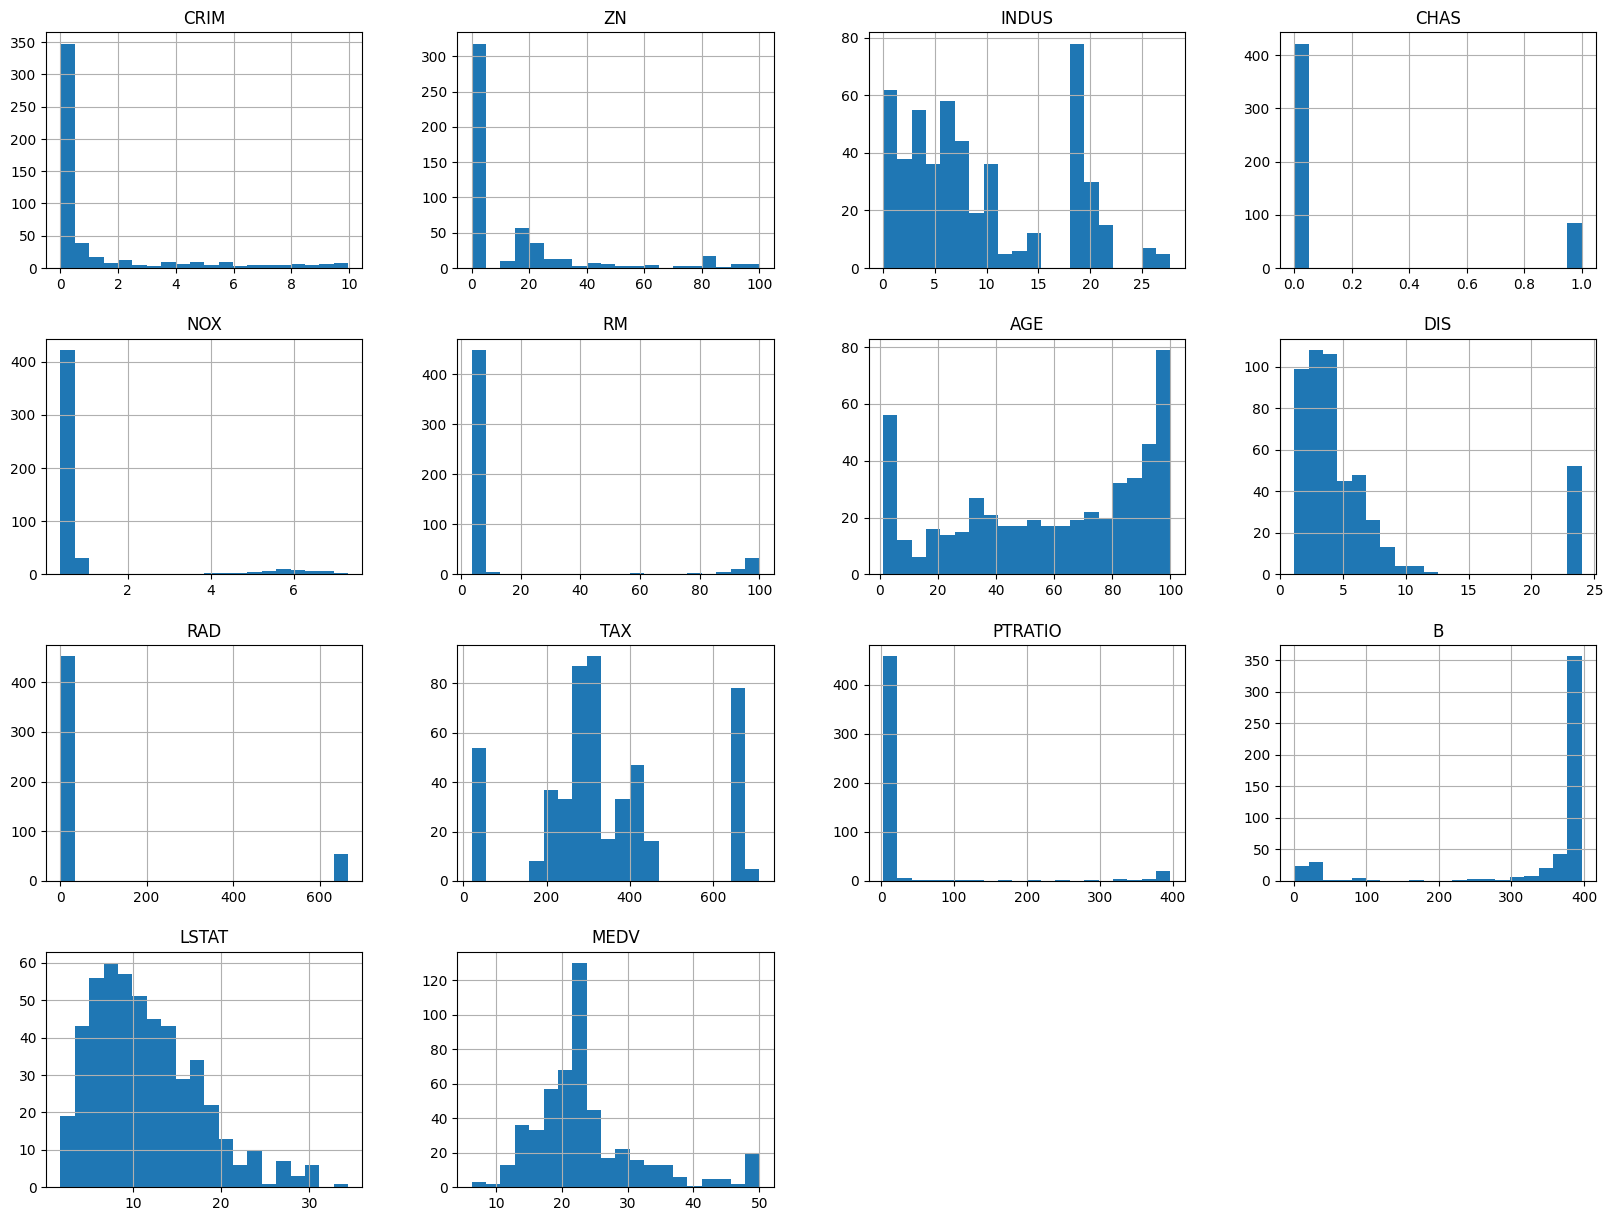

In [208]:
dataSet.hist(bins=20, figsize=(20,15))
plt.show()

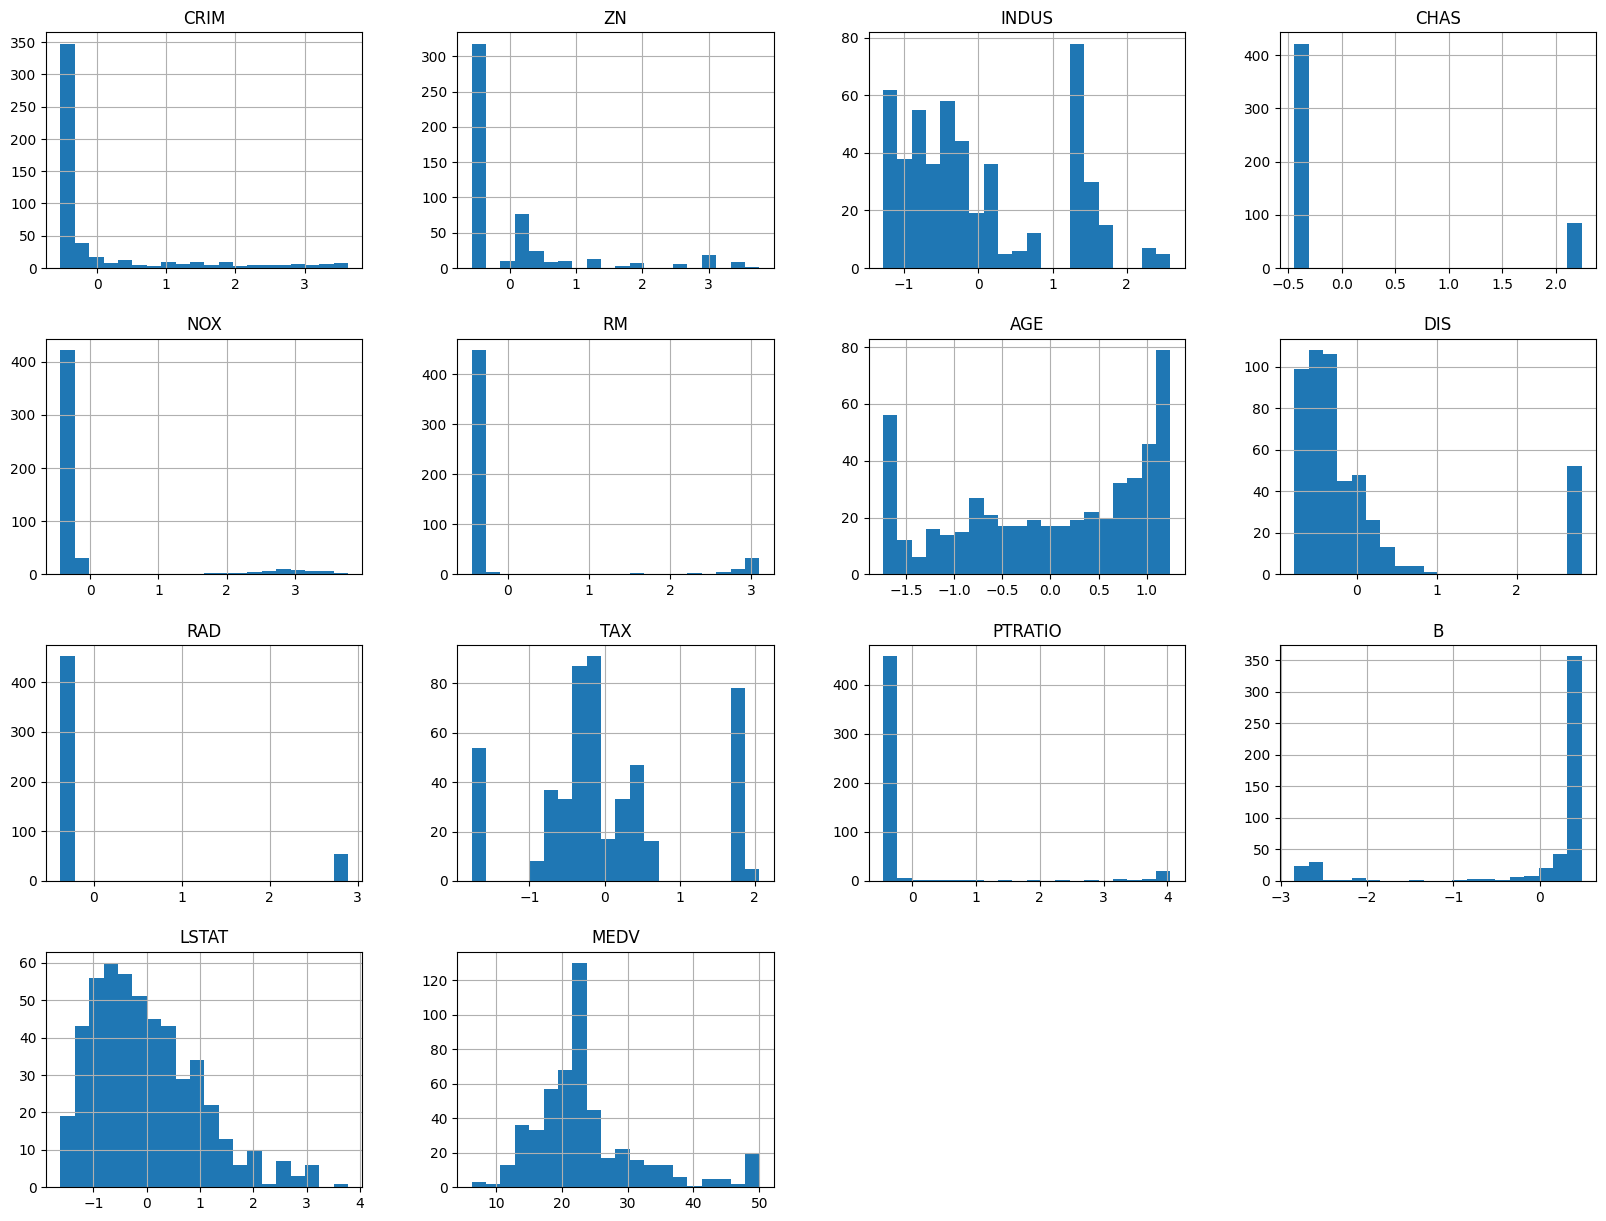

In [209]:
normalization(dataSet, ["MEDV"])
standardization(dataSet, ["MEDV"])
dataSet.hist(bins=20, figsize=(20,15))
plt.show()

As we can see, all of our datas in this dataset are numerical.

## Question 11:
1. **One-Hot Encoding**: This method creates a binary column for each category and is useful when categories do not have an ordinal relationship. For models that assume linearity, like logistic regression, it’s often necessary to use one-hot encoding.

2. **Label Encoding**: This technique assigns a unique integer to each category. It is ideal for ordinal variables where the order matters but can introduce a notion of order for nominal variables that don't have any order which might not be suitable for some algorithms.

3. **Feature Hashing**: Also known as the hashing trick, it is a fast and space-efficient way of vectorizing features, useful when you have a large number of categories.

4. **Binary Encoding**: This method combines the features of both the one-hot encoding and hashing, converting categories into binary numbers and then splitting those numbers into separate columns.

5. **Target Encoding**: Sometimes known as mean encoding. This replaces categorical values with the mean target value for that category. It can be very powerful but can also lead to overfitting if not regularized properly.

6. **Frequency or Count Encoding**: Here you replace categories with their frequencies or count in the dataset. It is simple and can be useful when the frequency is important.

7. **Embedding Layers**: Mostly used in neural networks where high-dimensional categorical variables are converted into learnable vectors.

8. **Ordinal Encoding**: When the categorical feature is ordinal, the categories can be transformed into numbers in a meaningful order.

Not all methods are suitable for every algorithm. Linear models benefit from one-hot encoding, while algorithms such as tree-based models can handle label encoding well because they are not influenced by the ordinal nature implied by integers.

The choice of which encoding method to use depends on:
- The model being used.
- The nature of the categorical features (ordinal or nominal).
- The number of categories (high cardinality categories might require more sophisticated encoding methods).
- The size of the dataset (one-hot encoding can significantly increase the dimensionality of your dataset).

Before applying these methods, you should analyze your data closely and understand the nature of your categorical variables, along with the requirements of the models you plan to use.

In [210]:
def encode_categories(data: pd.DataFrame):
    to_encode = data.select_dtypes(include=['category', 'object'])
    data[to_encode.columns] = to_encode.apply(LabelEncoder().fit_transform)

In [211]:
display(dataSet.head(10))

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.526893,0.204324,-0.962669,-0.446153,-0.342280,-0.334818,0.195195,-0.314098,-0.378985,-0.239999,-0.312176,0.486499,-1.082336,24.0
1,-0.518136,-0.577404,-0.298101,-0.446153,-0.384216,-0.340481,0.609451,-0.176299,-0.374068,-0.539182,-0.283604,0.486499,-0.395747,21.6
2,-0.518144,-0.577404,-0.298101,-0.446153,-0.384216,-0.312386,0.071220,-0.176299,-0.374068,-0.539182,-0.283604,0.452326,-1.239130,34.7
3,-0.516024,-0.577404,-0.980819,-0.446153,-0.390902,-0.319263,-0.391416,-0.004249,-0.369150,-0.649991,-0.273318,0.435996,-1.419029,33.4
4,-0.500721,-0.577404,-0.980819,-0.446153,-0.390902,-0.313783,-0.137420,-0.004249,-0.369150,-0.649991,-0.273318,0.486499,-1.024570,36.2
5,-0.517076,-0.577404,-0.980819,-0.446153,-0.390902,-0.340150,-0.001350,-0.004249,-0.369150,-0.649991,-0.273318,0.463158,-1.044376,28.7
6,-0.492694,-0.034537,-0.186408,-0.446153,-0.350789,-0.355521,0.237527,-0.083071,-0.359314,-0.156893,-0.313319,0.475584,0.147253,22.9
7,-0.469221,-0.034537,-0.186408,-0.446153,-0.350789,-0.349638,1.129539,-0.021798,-0.359314,-0.156893,-0.313319,0.486499,1.256358,27.1
8,-0.441397,-0.034537,-0.186408,-0.446153,-0.350789,-0.369532,1.247466,-0.001123,-0.359314,-0.156893,-0.313319,0.400269,3.035548,16.5
9,-0.458586,-0.034537,-0.186408,-0.446153,-0.350789,-0.355816,0.821114,0.079002,-0.359314,-0.156893,-0.313319,0.400941,0.918015,18.9


As you can see, we have no categorical data in our dataSet.

## Question 12:
Splitting data has many different ways to approach here i have a summary of ways we can do that and what I did in this project:

When deciding how to split my data, I usually follow a guideline like the 70:30 or 80:20 ratio for training and testing sets. This means that I allocate 70-80% of the data to train my model, leaving the remaining 20-30% for testing its performance. There are different ways to split the data:

1. **Random Split:** I randomly divide the data into training and testing sets.

2. **Stratified Split:** I make sure that the proportions of different classes are maintained in both training and testing sets.

3. **K-fold Cross-Validation:** I divide the data into K folds of equal size and train and evaluate the model K times. Each fold is used once as the test set, with the remaining folds forming the training set.

To achieve this, I use the `train_test_split` function from the sklearn library, which automatically applies the Stratified method for data splitting.


**Validation:**
Purpose: The validation set is employed to fine-tune the model and optimize its hyperparameters.
Usage: After training on the training set, the model's performance is assessed on the validation set. This helps in making adjustments to the model, preventing overfitting (model performing well on training data but poorly on new data), and improving generalization.

In [212]:
from sklearn.model_selection import train_test_split

X = dataSet.drop(columns=['MEDV'])  # Features
y = dataSet['MEDV']  # Target variable

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


Now X_train and y_train contain the training data,
X_val and y_val contain the validation data,
and X_test and y_test contain the testing data

In [213]:
print("X_train data numbers:\n") 
print(X_train.count())
print("\n------------------------------------------\n")
print("Y_train data numbers:\n") 
print(y_train.count())

X_train data numbers:

CRIM       404
ZN         404
INDUS      404
CHAS       404
NOX        404
RM         404
AGE        404
DIS        404
RAD        404
TAX        404
PTRATIO    404
B          404
LSTAT      404
dtype: int64

------------------------------------------

Y_train data numbers:

404


In [214]:
display(X_train.head(10))

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,-0.529530,0.208667,-1.285180,2.241386,2.554346,3.001482,-1.712782,2.813927,2.891384,-1.768049,3.507083,-2.636839,0.076283
15,-0.267772,-0.577404,-0.148712,-0.446153,-0.342280,-0.362067,-0.067873,-0.341199,-0.364232,-0.179054,-0.247032,0.475752,-0.506328
332,-0.515069,0.942623,-0.439112,-0.446153,-0.403118,-0.354823,-1.071764,0.086638,-0.378985,-0.195676,-0.293890,0.195568,-0.611957
423,2.412024,-0.577404,1.241856,-0.446153,-0.296090,-0.352175,0.796924,-0.639030,-0.265875,1.809959,-0.256175,-2.824832,1.939646
19,-0.226714,-0.577404,-0.148712,-0.446153,-0.342280,-0.366002,0.325217,-0.360210,-0.364232,-0.179054,-0.247032,0.436541,-0.042550
325,-0.449483,-0.577404,-0.254820,-0.446153,-0.369630,-0.340113,-1.331808,-0.341199,-0.359314,-0.289863,-0.263032,0.459463,-1.065832
335,-0.513004,-0.577404,-0.560577,-0.446153,-0.356259,-0.354602,-0.733102,-0.016331,-0.359314,-0.638910,-0.256175,0.486499,-0.582248
56,-0.520956,3.114089,-1.181865,-0.446153,-0.420075,-0.341878,-0.696817,0.486777,-0.374068,-0.145812,-0.289319,0.486499,-0.951950
437,-0.529530,0.208667,-1.285180,2.241386,3.069734,3.100772,-1.718421,2.813927,2.891384,-1.768049,-0.380520,0.435996,-0.468367
409,-0.529530,0.208667,-1.285180,2.241386,3.495172,3.100772,-1.731989,2.813927,2.891384,-1.768049,1.562824,-2.679912,2.634488


In [215]:
print("X_Val data numbers:\n") 
print(X_val.count())
print("\n------------------------------------------\n")
print("Y_Val data numbers:\n") 
print(y_val.count())

X_Val data numbers:

CRIM       51
ZN         51
INDUS      51
CHAS       51
NOX        51
RM         51
AGE        51
DIS        51
RAD        51
TAX        51
PTRATIO    51
B          51
LSTAT      51
dtype: int64

------------------------------------------

Y_Val data numbers:

51


In [216]:
print("X_test data numbers:\n") 
print(X_test.count())
print("\n------------------------------------------\n")
print("Y_test data numbers:\n") 
print(y_test.count())

X_test data numbers:

CRIM       51
ZN         51
INDUS      51
CHAS       51
NOX        51
RM         51
AGE        51
DIS        51
RAD        51
TAX        51
PTRATIO    51
B          51
LSTAT      51
dtype: int64

------------------------------------------

Y_test data numbers:

51


## Question 13:

- Imputation: Handling missing values is essential for most datasets. Imputation involves filling in missing values with estimated ones. Simple imputation methods include filling missing values with the mean, median, or mode of the feature. More sophisticated techniques involve using predictive models to estimate missing values based on other features.

- Feature Scaling: Scaling features to a similar range can improve the performance of many machine learning algorithms. Common scaling techniques include:

- Min-Max Scaling: Scales features to a range between 0 and 1.
Standardization (Z-score normalization): Scales features to have a mean of 0 and a standard deviation of 1.
Robust Scaling: Scales features using the median and interquartile range, making it robust to outliers.
Normalization: Normalizing features involves scaling each feature to have a unit norm (i.e., a magnitude of 1). This is particularly useful for algorithms that rely on the distance between data points, such as K-Nearest Neighbors (KNN) and Support Vector Machines (SVM).

- Encoding Categorical Variables: Many machine learning algorithms require numerical input, so categorical variables need to be encoded. Common techniques include:

- One-Hot Encoding: Converts categorical variables into binary vectors.
Label Encoding: Maps each category to a numerical value.
Feature Engineering: Creating new features from existing ones can improve model performance. This might involve transformations, aggregations, or interactions between features.

- Dimensionality Reduction: Reducing the number of features can help reduce computational complexity and alleviate the curse of dimensionality. Principal Component Analysis (PCA) and t-distributed Stochastic Neighbor Embedding (t-SNE) are popular dimensionality reduction techniques.

- Outlier Detection and Removal: Outliers can adversely affect model performance, so it's often necessary to identify and handle them. Techniques include using statistical methods like Z-score, or using robust estimators like the interquartile range (IQR).

- Data Augmentation: For tasks like image classification, data augmentation techniques such as rotation, flipping, and scaling can increase the size of the training dataset and improve model generalization.

- Text Preprocessing: For natural language processing tasks, text data often requires preprocessing steps like tokenization, removing stopwords, stemming or lemmatization, and vectorization (converting text into numerical form).

# Third Part: Training, evaluation and analysis

# **<font color="#f0e68c">Phase1: Linear Regression<font>** 

## Question 14:
- Supervised Learning:
In supervised learning, the model learns from labeled data, where each input is associated with a corresponding target or output.
The goal is to learn a mapping from input variables to output variables based on example input-output pairs.
Supervised learning tasks include classification (predicting a label or category) and regression (predicting a continuous value).

- Unsupervised Learning:
In unsupervised learning, the model learns patterns and structures from unlabeled data without any explicit supervision.
The model aims to find hidden patterns or relationships in the data, such as clustering similar data points together or dimensionality reduction.
Common tasks in unsupervised learning include clustering, dimensionality reduction, and anomaly detection.

- Semi-Supervised Learning:
Semi-supervised learning lies between supervised and unsupervised learning, where the dataset contains both labeled and unlabeled data.
The model leverages both labeled and unlabeled data to improve learning accuracy, especially when labeled data is scarce or expensive to obtain.

- Semi-supervised learning algorithms combine aspects of supervised and unsupervised learning to make predictions.
Reinforcement Learning:
Reinforcement learning is a type of machine learning where an agent learns to make decisions by interacting with an environment.
The agent receives feedback in the form of rewards or penalties based on its actions, and its goal is to learn a policy that maximizes cumulative reward over time.
Reinforcement learning is commonly used in tasks such as game playing, robotics, and autonomous vehicle control.

## Question 15:
Regression is a statistical method used to model and analyze the relationship between a dependent variable (target) and one or more independent variables (features). It aims to predict continuous numerical values based on input features. Regression models are widely used for forecasting, trend analysis, and understanding the relationship between variables.

The key differences between regression and classification methods:

- Nature of Output:

Regression predicts continuous numerical values. The output can take any real number within a specific range.
Classification predicts discrete categorical values or class labels. The output is typically limited to a predefined set of classes or categories.
- Problem Type:

Regression is used for predicting quantities such as sales figures, temperature, stock prices, etc.
Classification is used for tasks like spam detection, sentiment analysis, image recognition, etc.
- Evaluation Metrics:

In regression, evaluation metrics include Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-squared (coefficient of determination).
In classification, evaluation metrics include accuracy, precision, recall, F1-score, ROC-AUC (Receiver Operating Characteristic - Area Under the Curve), etc.
- Model Complexity:

Regression models aim to fit a curve or surface to the data, capturing the underlying relationship between variables. They can be simple (e.g., linear regression) or complex (e.g., polynomial regression, neural networks).
Classification models focus on dividing the feature space into distinct regions corresponding to different classes. They include algorithms like logistic regression, decision trees, support vector machines, and neural networks.
- Output Interpretation:

In regression, the output represents the estimated value of the dependent variable. It provides insight into how changes in the independent variables affect the target variable.
In classification, the output represents the predicted class label or probability distribution over classes. It indicates the likelihood of an instance belonging to each class.

## Question 16:

Main form of simple linear regression function:
$$f(x) = \alpha x + \beta$$

here we want to find the bias ($\alpha$) and slope($\beta$) by minimizing the derivation of the Residual Sum of Squares (RSS) function:

- step 1: Compute RSS of the training data  

$$ RSS = \Sigma (y_i - (\hat{\beta} + \hat{\alpha} * x_i) )^2 $$

- step 2: Compute the derivatives of the RSS function in terms of $\alpha$ and $\beta$, and set them equal to 0 to find the desired parameters

$$ \frac{\partial RSS}{\partial \beta} = \Sigma (-f(x_i) + \hat{\beta} + \hat{\alpha} * x_i) = 0$$
$$ \to \beta = \hat{y} - \hat{\alpha} \hat{x} \to (1)$$


$$ \frac{\partial RSS}{\partial \alpha} = \Sigma (-2 x_i y_i + 2 \hat{\beta} x_i + 2\hat{\alpha} x_i ^ 2) = 0 \to (2)$$

$$ (1) , (2) \to \hat{\alpha} = \frac{\Sigma{(x_i - \hat{x})(y_i - \hat{y})}}{\Sigma{(x_i - \hat{x})^2}}
$$
$$ \hat{\beta} = y - \hat{a} x$$


In simple linear regression, we have a model of the form:

$[ f(x) = \alpha x + \beta ]$

Here, $(\alpha)$ represents the slope of the line (how much $( y )$ changes for a change in $( x )$), and $(\beta)$ represents the y-intercept (the value of $( y )$ when $( x = 0 )$).

**The goal of linear regression is to find the values of $(\alpha)$ and $(\beta)$ that best fit the data.**"Best fit" typically means that the sum of the squared differences between the observed values ($( y_i )$) and the values predicted by our model ($( f(x_i) = \hat{\beta} + \hat{\alpha} x_i )$) is minimized. This sum of squared differences is known as the Residual Sum of Squares (RSS):

$[ RSS = \Sigma (y_i - (\hat{\beta} + \hat{\alpha} x_i))^2 ]$

To minimize the RSS, the partial derivatives of RSS with respect to $(\alpha)$ and $(\beta)$ are set to zero. The equations obtained from these steps provide us with the least squares estimates for $(\alpha)$ and $(\beta)$.

**Step 1: Compute RSS of the Training Data**

This equation represents the sum of the squared residuals, which we are trying to minimize through selection of appropriate $(\alpha)$ and $(\beta)$ values.

**Step 2: Compute the Derivatives of the RSS Function in Terms of $(\alpha)$ and $(\beta)$**

Setting each partial derivative equal to zero provides the minimum point of RSS, assuming a convex loss surface.

First equation:

$[ \frac{\partial RSS}{\partial \beta} = \Sigma (-f(x_i) + \hat{\beta} + \hat{\alpha} x_i) = 0 ]$

By solving this equation, we get the expression for \(\beta\):

$[ \hat{\beta} = \hat{y} - \hat{\alpha} \hat{x} ]$

Here, $( \hat{x} )$ is the mean of all $( x )$ values and $( \hat{y} )$ is the mean of all $( y )$ values.

Second equation:

$[ \frac{\partial RSS}{\partial \alpha} = \Sigma (-2 x_i y_i + 2 \hat{beta} x_i + 2 \hat{alpha} x_i^2) = 0 ]$

By solving the above with the first equation, we get the expression for $(\alpha)$:

$[ \hat{\alpha} = \frac{\Sigma (x_i - \hat{x})(y_i - \hat{y})}{\Sigma (x_i - \hat{x})^2} ]$

This represents the slope ($(\alpha)$) as the ratio of the covariance of $( x )$ and $( y ) $to the variance of $( x )$, giving the average change in $( y )$ per unit change in $( x )$.

Finally, using $(\alpha)$ from the second equation into the first, we get $(\beta)$:

$[ \hat{\beta} = \hat{y} - \hat{\alpha} \hat{x} ]$

This $(\beta)$ value ensures that our line passes through the centroid ($( \hat{x}, \hat{y} )$) of the data, providing the best balance between all points.

Essentially, these steps are used to arrive at the least squares estimates for the regression line, which is the line that minimizes the sum of the squared residuals (differences) between the predicted values and the actual values of the target variable.

## Question 17:

Based on the above formula, implement the function below to compute the parameters of a simple linear regression

In [217]:
def linear_regression(input, output):
  inputSum = np.sum(input)
  outputSum = np.sum(output)
  multOut = np.sum(input * output)
  SSi = np.sum(input ** 2)
  intercept = (multOut - (len(input) * (inputSum / len(input)) * (outputSum / len(output)))) / (SSi - len(input) * ((inputSum / len(input)) ** 2))
  slope = (outputSum / len(output)) - intercept * (inputSum / len(input))
  print ("intercept: " , intercept)
  print ("slope: " , slope)
  return (intercept, slope)

Now complete this `get_regression_predictions(...)` function to predict the value of given data based on the calculated intercept and slope

In [218]:
def get_regression_predictions(input, intercept, slope):
    return input * intercept + slope

Because there was the highest correlation between the RM feature and our target feature, and the most similarity in linear increase or decrease, the use of this feature will probably give us the most accuracy. As a result, at this stage, this feature was used to predict the MEDV feature.

In [219]:
intercept, slope = linear_regression(X_train["RM"], y_train)
predictedValues = get_regression_predictions(X_test["RM"], intercept, slope)

intercept:  -0.4823474861189645
slope:  23.78774965535519


## Question 18:
1. **Mean Squared Error (MSE)**:
   - Definition: MSE measures the average squared difference between the estimated values and the actual value. It is a way to quantify the error of a model's predictions.
   - Formula: $[ MSE = \frac{1}{n} \Sigma_{i=1}^{n} (y_i - \hat{y_i})^2 ]$
   - Explanation: For each point, you calculate the square of the difference between the prediction $((\hat{y_i})$) and the actual value $((y_i)$), and then average those values.

2. **Root Mean Squared Error (RMSE)**:
   - Definition: RMSE is the square root of the mean squared error. It measures how well a regression model predicts the outcome of interest.
   - Formula: $[ RMSE = \sqrt{MSE} = \sqrt{\frac{1}{n} \Sigma_{i=1}^{n} (y_i - \hat{y_i})^2} ]$
   - Explanation: RMSE is simply the square root of MSE and provides error terms in the same units as the response variable, which can be useful for interpretation.

3. **Residual Sum of Squares (RSS)**:
   - Definition: RSS is the sum of the squared differences between the observed dependent variable and the value predicted by the model.
   - Formula: $[ RSS = \Sigma_{i=1}^{n} (y_i - \hat{y_i})^2 ]$
   - Explanation: Instead of averaging the square residuals (as in MSE), in RSS, you sum them up. This gives you a total measure of the model's error.

4. **R-squared (R²) Score**:
   - Definition: R² is the proportion of variance in the dependent variable that can be predicted from the independent variable(s). It is a statistic that will give some information about the goodness of fit of a model.
   - Formula: $4[ R^2 = 1 - \frac{RSS}{TSS} = 1 - \frac{\Sigma (y_i - \hat{y_i})^2}{\Sigma (y_i - \bar{y})^2} ]$
   - Explanation: TSS or Total Sum of Squares is the total variance in the response variable. R² compares the fit of the chosen model with that of a horizontal straight line (mean of the observed data). An R² of 1 indicates that the regression predictions perfectly fit the data, while an R² of 0 indicates no linear relationship between the dependent and independent variables.

Each of these metrics provides different information:

- **MSE** and **RMSE** measure the average error magnitude and can be used to compare different models. Since these are both error metrics, lower values imply a better fit.
- **RMSE** is more sensitive to outliers than MSE since the errors are squared before taking the mean, thus highlighting larger errors.
- **RSS** provides a single sum of error magnitude, useful for optimization purposes such as in gradient descent.
- **R²** is a relative measure of fit; it tells us how much of the variability in the response data can be explained by the model. An R² score will normally be between 0 and 1, and a higher score indicates a better fit.

It's worth noting that while a higher R² is generally better, it is not a definitive measure of model quality. For example, a high R² value does not indicate that the model has the correct regression function or that it will make good predictions on new data. Additionally, in models with a large number of predictors, R² will tend to overstate the model's effectiveness because it will always increase as more predictors are added regardless of their relevance. This is why it is sometimes better to look at the adjusted R² which penalizes more complex models, or to use other information criteria like AIC or BIC for model selection.

Now that we have a model and can make predictions, let's evaluate our model using Root Mean Square Error (RMSE). RMSE is the square root of the mean of the squared differences between the residuals, and the residuals is just a fancy word for the difference between the predicted output and the true output.

Complete the following function to compute the RSME of a simple linear regression model given the input_feature, output, intercept and slope:

In [220]:
import math

def get_root_mean_square_error(predicted_values, actual_values):
  residuals = predicted_values - actual_values
  residuals_sum_sqr = (residuals ** 2).sum()
  mean_residual_sqr = residuals_sum_sqr/len(predicted_values)
  return math.sqrt(mean_residual_sqr)


The RMSE has no bound, thus it becomes challenging to determine whether a particular RMSE value is considered good or bad without any reference point. Instead, we use R2 score. The R2 score is calculated by comparing the sum of the squared differences between the actual and predicted values of the dependent variable to the total sum of squared differences between the actual and mean values of the dependent variable. The R2 score is formulated as below:

$$R^2 = 1 - \frac{SSres}{SStot} = 1 - \frac{\sum_{i=1}^{n} (y_{i,true} - y_{i,pred})^2}{\sum_{i=1}^{n} (y_{i,true} - \bar{y}_{true})^2} $$

Complete the following function to calculate the R2 score of a given input_feature, output, bias, and slope:

In [221]:
def get_r2_score(predicted_values, actual_values):
  residuals = predicted_values - actual_values
  SSres = (residuals ** 2).sum()
  SStot = ((actual_values - actual_values.mean())**2).sum()
  return 1 - SSres / SStot

## Question 19 & 20:

For calculating the fitness of our model I wrote a new function(`test_linear_regression`) which gets a feature and make the model with that feature and then calculates R2 score and RMSE for it. It also plots the data with the regression line.

In [222]:
def test_simple_linear_regression(feature, ax):
    
    print(feature + ":")
    
    intercept, slope = linear_regression(X_train[feature], y_train)
    predicted_values = get_regression_predictions(X_test[feature], intercept, slope)
    
    rmse = get_root_mean_square_error(predicted_values, y_test)
    r2_score = get_r2_score(predicted_values, y_test)
    
    print ("R2 score: " , get_r2_score(predicted_values, y_test))
    print ("RMSE score: " , get_root_mean_square_error(predicted_values, y_test))
    print ("-------------------------------------------------------------")
    
    ax.scatter(X_train[feature], y_train)
    
    x_line = np.linspace(min(dataSet[feature]), max(dataSet[feature]), 100)
    y_line = intercept * x_line + slope
    
    ax.plot(x_line, y_line, color='red', label = f"y = {slope:0.2f} * x + {intercept:0.2f}")

    ax.set_ylabel("MEDV")
    ax.set_title(feature)
    ax.legend()


CRIM:
intercept:  -2.467539449964527
slope:  23.765576886524716
R2 score:  0.07436031983947433
RMSE score:  7.778243101497411
-------------------------------------------------------------
ZN:
intercept:  2.2825326534327144
slope:  23.769601372414815
R2 score:  0.3337375263815643
RMSE score:  6.599077170889495
-------------------------------------------------------------
INDUS:
intercept:  -2.7428416076708353
slope:  23.733343221170013
R2 score:  0.20445824116371047
RMSE score:  7.2109423131240336
-------------------------------------------------------------
CHAS:
intercept:  0.35322132372917
slope:  23.789638085828468
R2 score:  -0.029049210060283936
RMSE score:  8.201222650592102
-------------------------------------------------------------
NOX:
intercept:  -0.8086425127054488
slope:  23.791055303808243
R2 score:  -0.020926052246916127
RMSE score:  8.168788915463207
-------------------------------------------------------------
RM:
intercept:  -0.4823474861189645
slope:  23.78774965535

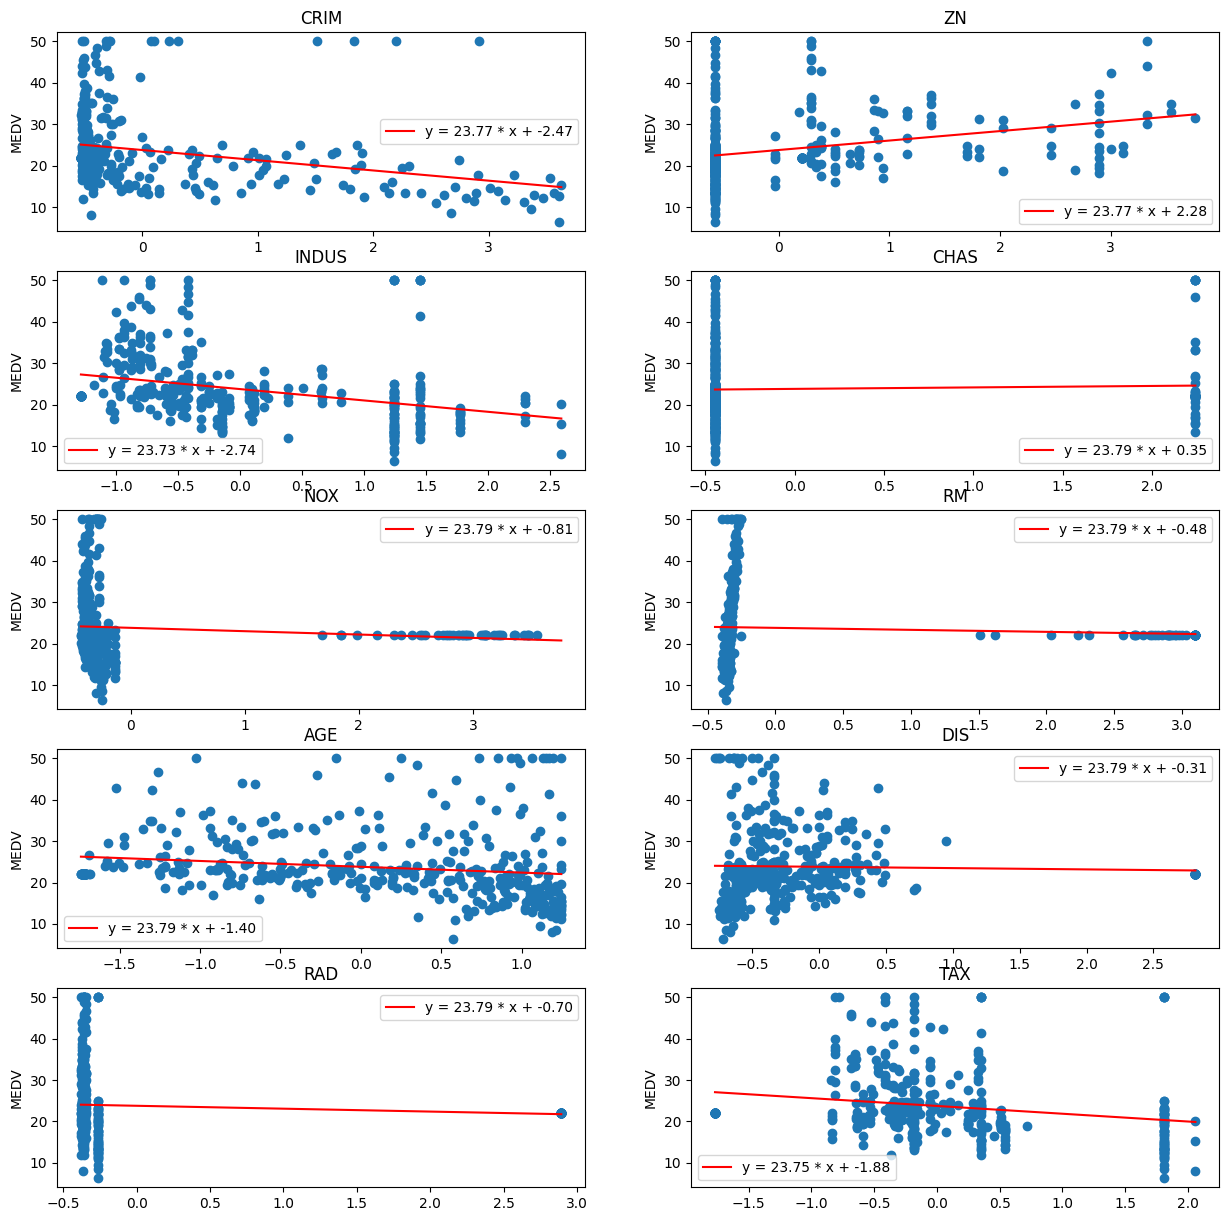

In [223]:
import matplotlib.pyplot as plt

figure, axs = plt.subplots(nrows=5, ncols=2, figsize=(15,15))
axs = axs.flatten()

for ax, feature in zip(axs, X_train.columns):
    test_simple_linear_regression(feature, ax)
   


Contrary to our assumption that RM had the highest correlation, after examining the R2 score and RMSE, we see that LSTAT has the highest accuracy.And as observed, it has the lowest RMSE value and highest R2 score. The reason for this could be that this feature has the highest correlation with our target feature, namely 'MEDV'.

To elaborate further, in predictive modeling, the accuracy of a feature can often be correlated with how strongly it is related to the target variable—the variable we're trying to predict. In this context, 'LSTAT' appears to be highly predictive of 'MEDV', which might indicate that identifying 'LSTAT' as highly predictive of 'MEDV' suggests that it is an important factor to consider when analyzing or modeling housing market data, as it provides valuable information for understanding and predicting home prices. This relationship is quantitatively assessed through correlation measures and can be observed by the low RMSE. A low RMSE suggests that the predictions made by the model are close to the real data points for this particular feature, thereby making it a reliable predictor in the model.

But the R2 score of 'LSTAT' is less than 0.5 and it is not good enough. It means we can't guess the price with simply one data.

Correlation coefficient measures the strength and direction of a linear relationship between two variables. A high correlation coefficient between 'RM' and the target variable 'MEDV' (median value of owner-occupied homes) indicates a strong linear relationship between these variables. However, correlation alone doesn't capture the predictive accuracy of a feature.
'LSTAT' might capture non-linear relationships with 'MEDV' that 'RM' does not. While 'RM' might have a strong linear relationship with 'MEDV', it's possible that 'LSTAT' captures additional nuances or interactions that better explain the variability in house prices.

In summary, while correlation provides valuable insights into the linear relationship between features and the target variable, it doesn't fully capture predictive accuracy. R2 score and RMSE provide complementary information by evaluating how well the model's predictions align with the actual values. The discrepancy you observed highlights the importance of considering multiple evaluation metrics when assessing the performance of predictive models.

Now calculate the fitness of the model.
Remember to provide explanation for the outputs in your code!

ZN:
intercept:  2.2825326534327144
slope:  23.769601372414815
R2 score:  0.3337375263815643
RMSE score:  6.599077170889495
-------------------------------------------------------------
INDUS:
intercept:  -2.7428416076708353
slope:  23.733343221170013
R2 score:  0.20445824116371047
RMSE score:  7.2109423131240336
-------------------------------------------------------------
CHAS:
intercept:  0.35322132372917
slope:  23.789638085828468
R2 score:  -0.029049210060283936
RMSE score:  8.201222650592102
-------------------------------------------------------------
NOX:
intercept:  -0.8086425127054488
slope:  23.791055303808243
R2 score:  -0.020926052246916127
RMSE score:  8.168788915463207
-------------------------------------------------------------
RM:
intercept:  -0.4823474861189645
slope:  23.78774965535519
R2 score:  -0.024405568879298345
RMSE score:  8.182697493784293
-------------------------------------------------------------
AGE:
intercept:  -1.4041831175169108
slope:  23.7941975231

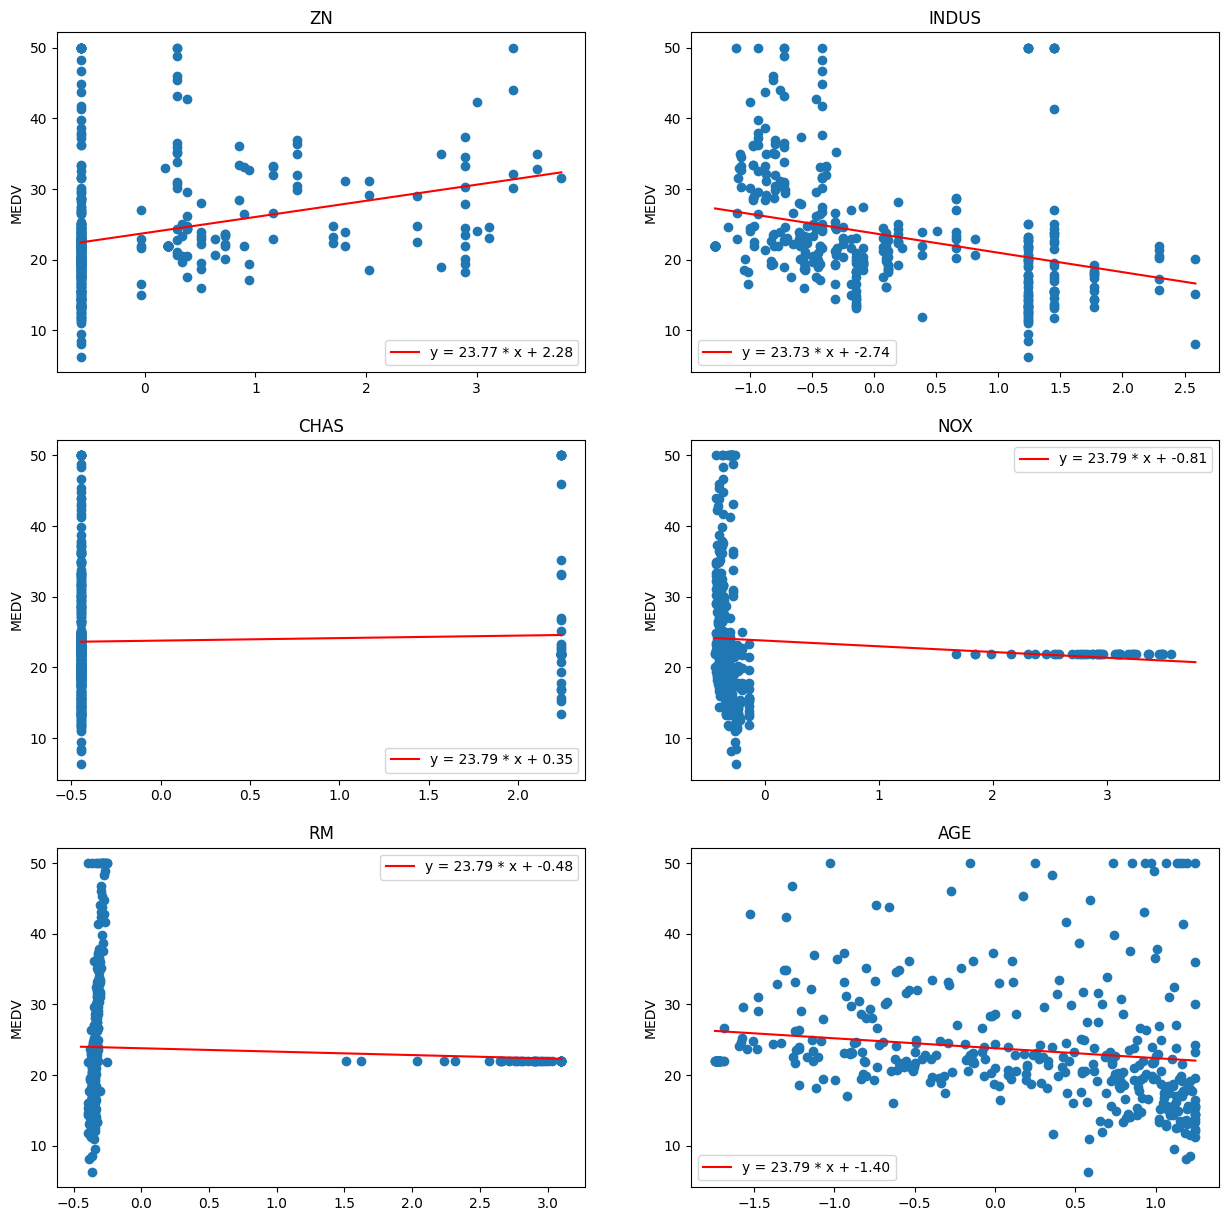

In [225]:
designated_feature_list = list(MEDVcorr.index)[1:7]

figure, axs = plt.subplots(nrows=3, ncols=2, figsize=(15,15))
axs = axs.flatten()
for ax, feature in zip(axs, designated_feature_list):
  test_simple_linear_regression(feature, ax)

# **<font color="#f0e68c">Phase2: Polynomial Regression<font>** 

# Polynomial Regression

To extend the simple linear regression to polynomial regression, we can model the relationship between the independent variable $x$ and the dependent variable $y$ as a polynomial function of degree $n$:

$$f(x) = \beta_0 + \beta_1x + \beta_2x^2 + \ldots + \beta_nx^n$$

The steps to find the parameters $\beta_i$ are similar to those in simple linear regression. We again minimize the RSS function by taking the derivatives with respect to each parameter and setting them to 0.

- Step 1: Compute the RSS function for polynomial regression:

$$ RSS = \Sigma (y_i - (\hat{\beta_0} + \hat{\beta_1}x_i + \hat{\beta_2}x_i^2 + \ldots + \hat{\beta_n}x_i^n))^2 $$

- Step 2: Compute the derivatives of the RSS function with respect to each parameter $\beta_i$ and set them to 0 to find the desired parameters.

$$ \frac{\partial RSS}{\partial \beta_i} = 0, \text{ for } i = 0, 1, 2, \ldots, n$$

Solving these equations will give us the optimal values of $\beta_i$ for the polynomial regression model. The specific form of the equations will depend on the degree of the polynomial and the number of parameters.

The general form for finding the coefficients for polynomial regression can be represented as:

$$ \beta = (X^T X)^{-1} X^T y $$

where:
- $X$ is the design matrix with columns $x^0, x^1, x^2, ..., x^n$
- $x^i$ represents the feature vector of $x$ raised to the power of $i$
- $y$ is the target variable vector
- $\beta$ is the coefficient vector for the polynomial regression

By solving for $\beta$ using the above formula, we can obtain the coefficients for the polynomial regression model.

In [226]:
def polynomial_regression(x, y, degree):
  pass
  #TO DO

# **<font color="#f0e68c">Phase3: Classification<font>** 

In [227]:
from abc import ABC, abstractmethod
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

class ClassifierModel(ABC):    
    def __init__(self, X_train, y_train, params):
        self.classifier = self.create_classifier(params)
        self.search_params = self.set_search_params()
        self.classifier.fit(X_train, y_train)
        self.train_accuracy = self.calc_accuracy(X_train, y_train)
        
    @abstractmethod
    def create_classifier(self, params):
        pass
    
    @abstractmethod
    def set_search_params(self):
        pass
    
    def predict(self, data):
        return self.classifier.predict(data)
    
    def get_train_accuracy(self):
        return self.train_accuracy
    
    def calc_accuracy(self, X_test, y_test):
        preds = self.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, preds)
        return accuracy

    def grid_search(self, X_train, y_train, X_test, y_test):
        grid = GridSearchCV(self.classifier, self.search_params, scoring='accuracy', n_jobs = 2)
        grid.fit(X_train, y_train)
        test_score = grid.score(X_test, y_test)
        return grid, test_score
    
    def draw_confusion_matrix(self, X_test, y_test):
        preds = self.classifier.predict(X_test)
        confusion_matrix = metrics.confusion_matrix(y_test, preds)
        fig, ax = plt.subplots(figsize=(8, 6))
        matrix_plot = metrics.ConfusionMatrixDisplay(confusion_matrix)
        matrix_plot.plot(cmap='BuPu', ax = ax)
        plt.title('Confusion Matrix')
        plt.show()

I wrote a function (`run_model`) that gets a classifier model and shows its accuracy and grid-search result and in the end plot its confusion matrix.

In [228]:
def run_model(Model, X_train, y_train, X_test, y_test, params):
    model = Model(X_train, y_train, params)
    print(f"model's train accuracy: {model.get_train_accuracy(): 0.3f}")
    print(f"model's test accuracy: {model.calc_accuracy(X_test, y_test): 0.3f}")
    grid, test_score = model.grid_search(X_train, y_train, X_test, y_test)
    print(f"Best hyperparameters: {grid.best_params_}")
    print(f"Best model's train accuracy score: {grid.best_score_:0.3f}")
    print(f"Best model's test score: {test_score:0.3f}")
    model.draw_confusion_matrix(X_test, y_test)

## Question 21:

Pruning in decision trees refers to the process of reducing the size of the tree by removing parts of it, specifically branches and leaves, in order to improve its generalization performance and prevent overfitting. The main idea is to simplify the tree by removing unnecessary nodes that do not contribute significantly to its predictive accuracy.

Advantages of pruning in decision trees include:

- Improved Generalization: Pruning helps prevent overfitting by simplifying the decision tree, which can lead to better generalization performance on unseen data.

- Reduced Complexity: Pruning results in a simpler and more interpretable tree structure, making it easier to understand and explain the decision-making process.

- Faster Prediction: Smaller trees resulting from pruning often lead to faster prediction times, as fewer nodes need to be traversed during inference.

- Robustness to Noise: Pruned trees are less sensitive to noise and outliers in the training data, as they are less likely to capture noise-induced patterns.

However, pruning also has some disadvantages:

- Loss of Information: Pruning may lead to a loss of information, as it removes parts of the tree that could potentially capture important patterns in the data.

- Pruning Heuristic Selection: Choosing the appropriate pruning strategy or heuristic can be challenging, and different strategies may yield different results.

- Underfitting: Over-aggressive pruning can lead to underfitting, where the model is too simple and fails to capture important patterns in the data.

- Dependency on Training Data: Pruning decisions are often based on the training data, and the effectiveness of pruning may depend on the quality and representativeness of the training dataset.



## Question 22:

Decision trees can have several advantages over other models in certain scenarios:

- Interpretability: Decision trees are highly interpretable, making them well-suited for tasks where understanding the decision-making process is important. Unlike complex models like neural networks, decision trees provide transparent rules that can be easily understood by humans.

- Ease of Use: Decision trees require minimal data preprocessing and feature engineering compared to some other models. They can handle both numerical and categorical data, as well as missing values, without the need for extensive preprocessing steps.

- Non-linear Relationships: Decision trees can capture non-linear relationships between features and the target variable without the need for explicit feature transformations. This makes them particularly useful for datasets with complex relationships that may not be well-suited for linear models.

- Mixed Data Types: Decision trees can handle mixed data types, including both categorical and numerical features, without requiring one-hot encoding or other transformations. This makes them versatile for datasets with diverse types of features.

- Scalability: Decision trees are relatively fast to train and can scale well to large datasets, especially when using algorithms optimized for efficiency, such as CART (Classification and Regression Trees) or random forests.

- Feature Importance: Decision trees provide a natural way to measure feature importance based on how often they are selected for splitting nodes. This can provide insights into which features are most relevant for predicting the target variable.



## Question 23:
The inherent difference lies in how each classifier is trained and makes predictions. KNN relies on stored instances and proximity-based voting, while ANNs and logistic regression involve iterative optimization of model parameters based on training data.

## Question 24:
The one nearest neighbor algorithm, also known as the 1-NN algorithm, is a simple and intuitive classification method where the class label of a new data point is assigned based on the class label of its nearest neighbor in the training dataset.

Advantages of the 1-NN algorithm:

1. **Simplicity**: The algorithm is straightforward and easy to implement, making it suitable for quick prototyping and experimentation.
  
2. **Non-parametric**: 1-NN is a non-parametric method, meaning it makes no assumptions about the underlying distribution of the data. It can capture complex decision boundaries without requiring a predefined model structure.

3. **Adaptability to Local Structure**: 1-NN adapts well to local patterns and variations in the data, as it relies on the nearest neighbor for classification. This makes it particularly useful for datasets with complex or nonlinear relationships.

Disadvantages of the 1-NN algorithm:

1. **Computational Complexity**: Classifying a new data point involves calculating distances to all training examples, which can be computationally expensive, especially for large datasets with many features.

2. **Sensitivity to Noise**: 1-NN is sensitive to noisy data and outliers, as it directly relies on the nearest neighbor for classification. Noisy data points can lead to incorrect predictions or reduced performance.

3. **Memory Requirements**: The algorithm requires storing the entire training dataset in memory, which can be memory-intensive for large datasets with many instances or high-dimensional feature spaces.

4. **Difficulty in Handling Imbalanced Data**: In datasets with imbalanced class distributions, the nearest neighbor may predominantly belong to the majority class, leading to biased predictions.

Overall, while the 1-NN algorithm offers simplicity and adaptability to local structure, it also has limitations related to computational complexity, sensitivity to noise, memory requirements, and handling of imbalanced data. These factors should be carefully considered when choosing and applying the algorithm to real-world classification tasks.

## Question 25:
Some common distance metrics include:

1. **Euclidean Distance**: This is the most commonly used distance metric in KNN. It measures the straight-line distance between two points in Euclidean space.

2. **Manhattan Distance**: Also known as city block distance or L1 norm, Manhattan distance calculates the sum of the absolute differences between the coordinates of two points.

3. **Minkowski Distance**: A generalization of both Euclidean and Manhattan distances, Minkowski distance is defined as the pth root of the sum of the absolute differences raised to the power of p.

4. **Cosine Similarity**: Instead of measuring the distance between two points, cosine similarity measures the cosine of the angle between two vectors. It is often used for text classification and recommendation systems.

5. **Hamming Distance**: Hamming distance is used for comparing strings of equal length. It measures the number of positions at which the corresponding symbols differ.

6. **Jaccard Distance**: Jaccard distance measures dissimilarity between sample sets. It is calculated as 1 minus the Jaccard similarity coefficient, which is the size of the intersection divided by the size of the union of the sample sets.

## Question 26:

In [229]:
top_decile_cutoff = dataSet['MEDV'].quantile(0.8)
bottom_decile_cutoff = dataSet['MEDV'].quantile(0.2)

dataSet['House_Category'] = Ordinary

dataSet.loc[dataSet['MEDV'] >= top_decile_cutoff, 'House_Category'] = Luxury
dataSet.loc[dataSet['MEDV'] <= bottom_decile_cutoff, 'House_Category'] = Economical

print(dataSet.head(10))

features = dataSet.drop(["MEDV", "House_Category"], axis="columns")
X_train, X_test, y_train, y_test = train_test_split(features, dataSet["House_Category"], test_size=0.2, random_state=42)
display(y_train)
display(y_test)
features.info()


       CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0 -0.526893  0.204324 -0.962669 -0.446153 -0.342280 -0.334818  0.195195   
1 -0.518136 -0.577404 -0.298101 -0.446153 -0.384216 -0.340481  0.609451   
2 -0.518144 -0.577404 -0.298101 -0.446153 -0.384216 -0.312386  0.071220   
3 -0.516024 -0.577404 -0.980819 -0.446153 -0.390902 -0.319263 -0.391416   
4 -0.500721 -0.577404 -0.980819 -0.446153 -0.390902 -0.313783 -0.137420   
5 -0.517076 -0.577404 -0.980819 -0.446153 -0.390902 -0.340150 -0.001350   
6 -0.492694 -0.034537 -0.186408 -0.446153 -0.350789 -0.355521  0.237527   
7 -0.469221 -0.034537 -0.186408 -0.446153 -0.350789 -0.349638  1.129539   
8 -0.441397 -0.034537 -0.186408 -0.446153 -0.350789 -0.369532  1.247466   
9 -0.458586 -0.034537 -0.186408 -0.446153 -0.350789 -0.355816  0.821114   

        DIS       RAD       TAX   PTRATIO         B     LSTAT  MEDV  \
0 -0.314098 -0.378985 -0.239999 -0.312176  0.486499 -1.082336  24.0   
1 -0.176299 -0.374068 -0.539182 

477    0
15     0
332    0
423    2
19     0
      ..
106    0
270    0
348    0
435    0
102    0
Name: House_Category, Length: 404, dtype: int64

173    0
274    1
491    2
72     0
452    2
      ..
412    0
436    0
411    0
86     0
75     0
Name: House_Category, Length: 102, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


### Decision Trees

```Decision trees``` are intuitive machine learning models used for classification and regression. They make a sequence of decisions based on features to predict outcomes. The tree structure consists of nodes, branches, and leaves. At each node, a feature is chosen to split the data, creating child nodes. The process continues recursively until a stopping criterion is met. Leaf nodes represent predictions. Decision trees are easy to understand and handle various data types, but they can overfit. Pruning and ensemble methods can address overfitting. Decision trees are popular for their interpretability and versatility.

some important hyper-parameters for this model:

- `criterion`: The function used to measure the quality of a split. The two options availabel are *gini* and *entropy*.

- `max_depth`: The maximum depth of the decision tree. A larger value of `max_depth` can capture more complex patterns in the data, but may also lead to overfitting. A smaller value of `max_depth` may lead to underfitting.

- `min_samples_split`: The minimum number of samples required to split an internal node.

- `min_samples_leaf`: The minimum number of samples required to be at a leaf node.

- `splitter`: The strategy used to choose the split at each node. The two options here are *random* and *best*. 

In [230]:
from sklearn.tree import DecisionTreeClassifier

class DecisionTreeModel(ClassifierModel):
    def create_classifier(self, params):
        return DecisionTreeClassifier(criterion=params["criterion"], max_depth=params["max_depth"],
                                      min_samples_split=params["min_samples_split"], min_samples_leaf=params["min_samples_leaf"])
    
    def set_search_params(self):
        return {
            'criterion': ["gini", "entropy"],
            'max_depth': range(5, 10),
            'min_samples_split': range(3, 10),
            'min_samples_leaf': range(1, 6),
        }    

model's train accuracy:  0.926
model's test accuracy:  0.853


Best hyperparameters: {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 5, 'min_samples_split': 6}
Best model's train accuracy score: 0.824
Best model's test score: 0.824


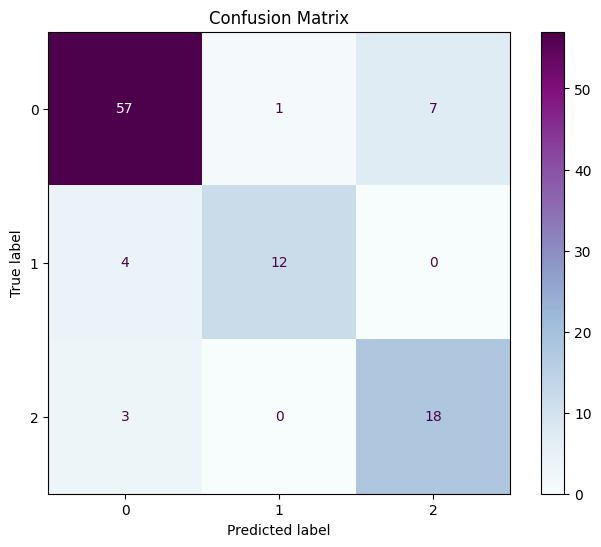

In [231]:
params = {
        'criterion': "entropy",
        'max_depth': 8,
        'min_samples_split': 5,
        'min_samples_leaf': 8,
}   
run_model(DecisionTreeModel, X_train, y_train, X_test, y_test, params)

In a confusion matrix, we have the following structure:

|             |         | **Predicted** | **Results** |
| :---------- | :-----: | :-: | :-: |
|             | *Value* | *0* | *1* |
| **Actual**  | *0*     | TN  | FP  |
| **Results** | *1*     | FN  | TP  |

* TN *(True Negative):*
* FP *(False Positive):*
* FN *(False Negative):* 
* TP *(True Positive):*



From confusion matrix we can infer accuracy:
$$Accuracy = \frac{TP + TN}{TP + TN + FP + FN} = 87.6 \%$$


`Overfitting` occurs when a machine learning model performs well on the training data but poorly on new, unseen data. This happens when the model learns the noise in the training data instead of capturing the underlying patterns.

 `Underfitting` occurs when a model is too simple to capture the underlying patterns in the data, resulting in poor performance on both the training and test data. This happens when the model is not complex enough to learn the relationships between the input features and the target variable.

Here our model both performs well on test and train so we don't have overfitting nor underfitting.



### K-Nearest Neighbors
KNN (k-nearest neighbors) is a supervised learning algorithm that predicts a target variable based on the k-nearest neighbors in the feature space. It classifies or regresses based on the majority class or average of the neighboring data points.
I simply changed `n_neighbors` for this model.


For KNN, I changed the data and normalized the encoded categorical features too. Because KNN is sensitive on distance.

In [232]:
scaler_std = StandardScaler()
X_train2 = scaler_std.fit_transform(X_train)
X_test2 = scaler_std.fit_transform(X_test)

In [233]:
from sklearn.neighbors import KNeighborsClassifier


class KNNModel(ClassifierModel):
    def create_classifier(self, params):
        return KNeighborsClassifier(n_neighbors=params["n_neighbors"])

    def set_search_params(self):
        return {
                'n_neighbors' : range(1, 90)
        }
        

model's train accuracy:  0.817
model's test accuracy:  0.853


Best hyperparameters: {'n_neighbors': 1}
Best model's train accuracy score: 0.822
Best model's test score: 0.843


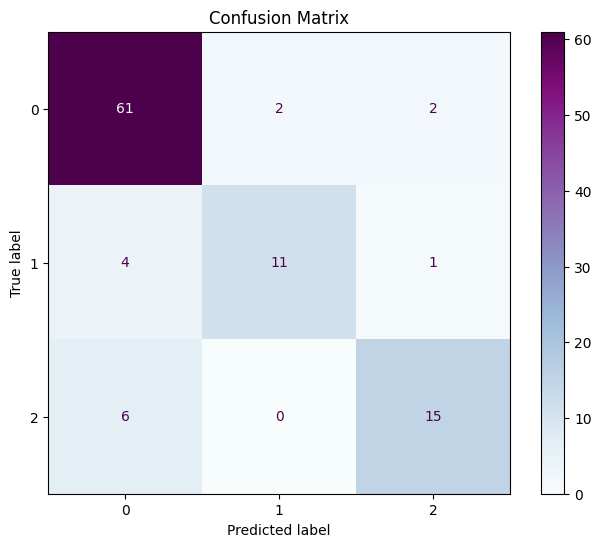

In [234]:
params = {
        'n_neighbors' : 18
}
run_model(KNNModel, X_train2, y_train, X_test2, y_test, params)

From confusion matrix we can infer accuracy:
$$Accuracy = \frac{TP + TN}{TP + TN + FP + FN} = 86.6 \%$$
Here our model both performs well on test and train so we don't have overfitting nor underfitting.



## Question 27:
GridSearchCV is a method provided by scikit-learn, a machine learning library in Python, that allows the systematic searching of the hyperparameter space for a given model. "CV" in GridSearchCV stands for cross-validation. It's a technique used to assess the effectiveness of a model by splitting the data into parts, where one set is used for training and the rest for testing; this process is repeated several times with different splits.

Here’s a brief overview of how GridSearchCV works:

1. **Parameter Grid**: You define a 'grid' of hyperparameter values you want to try for the model. This grid is usually specified as a dictionary, where keys are the hyperparameters, and the values are the lists of settings to be tested.

2. **Search**: GridSearchCV will systematically construct and evaluate a model for each combination of hyperparameters in your grid.

3. **Cross-Validation**: For each combination of hyperparameters, GridSearchCV uses cross-validation to provide a robust estimate of the model's performance.

4. **Selection**: Once all models have been evaluated, GridSearchCV selects the hyperparameters that yielded the best results.

5. **Refit**: By default, once the best hyperparameters are found, the model is retrained on the entire dataset.

Changing the hyperparameters and pre-processing methods causes a change in the accuracy of the model as well as the overfitting of the model. Above some changes have been made and optimized data has been saved

## Question 28:


In [235]:
DecisionTreeGridSearch = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid={
        "criterion": ["gini", "entropy"],
        "splitter": ["best", "random"],
        'max_depth': range(5, 10),
        'min_samples_split': range(3, 10),
        'min_samples_leaf': range(1, 6),
        "random_state": [84],
    },
    scoring="accuracy",
    cv= 4,
    n_jobs=-1,
)

DecisionTreeGridSearch.fit(X_train, y_train)
print(f"Best Parameters are : {DecisionTreeGridSearch.best_params_}")

Best Parameters are : {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 3, 'min_samples_split': 8, 'random_state': 84, 'splitter': 'best'}


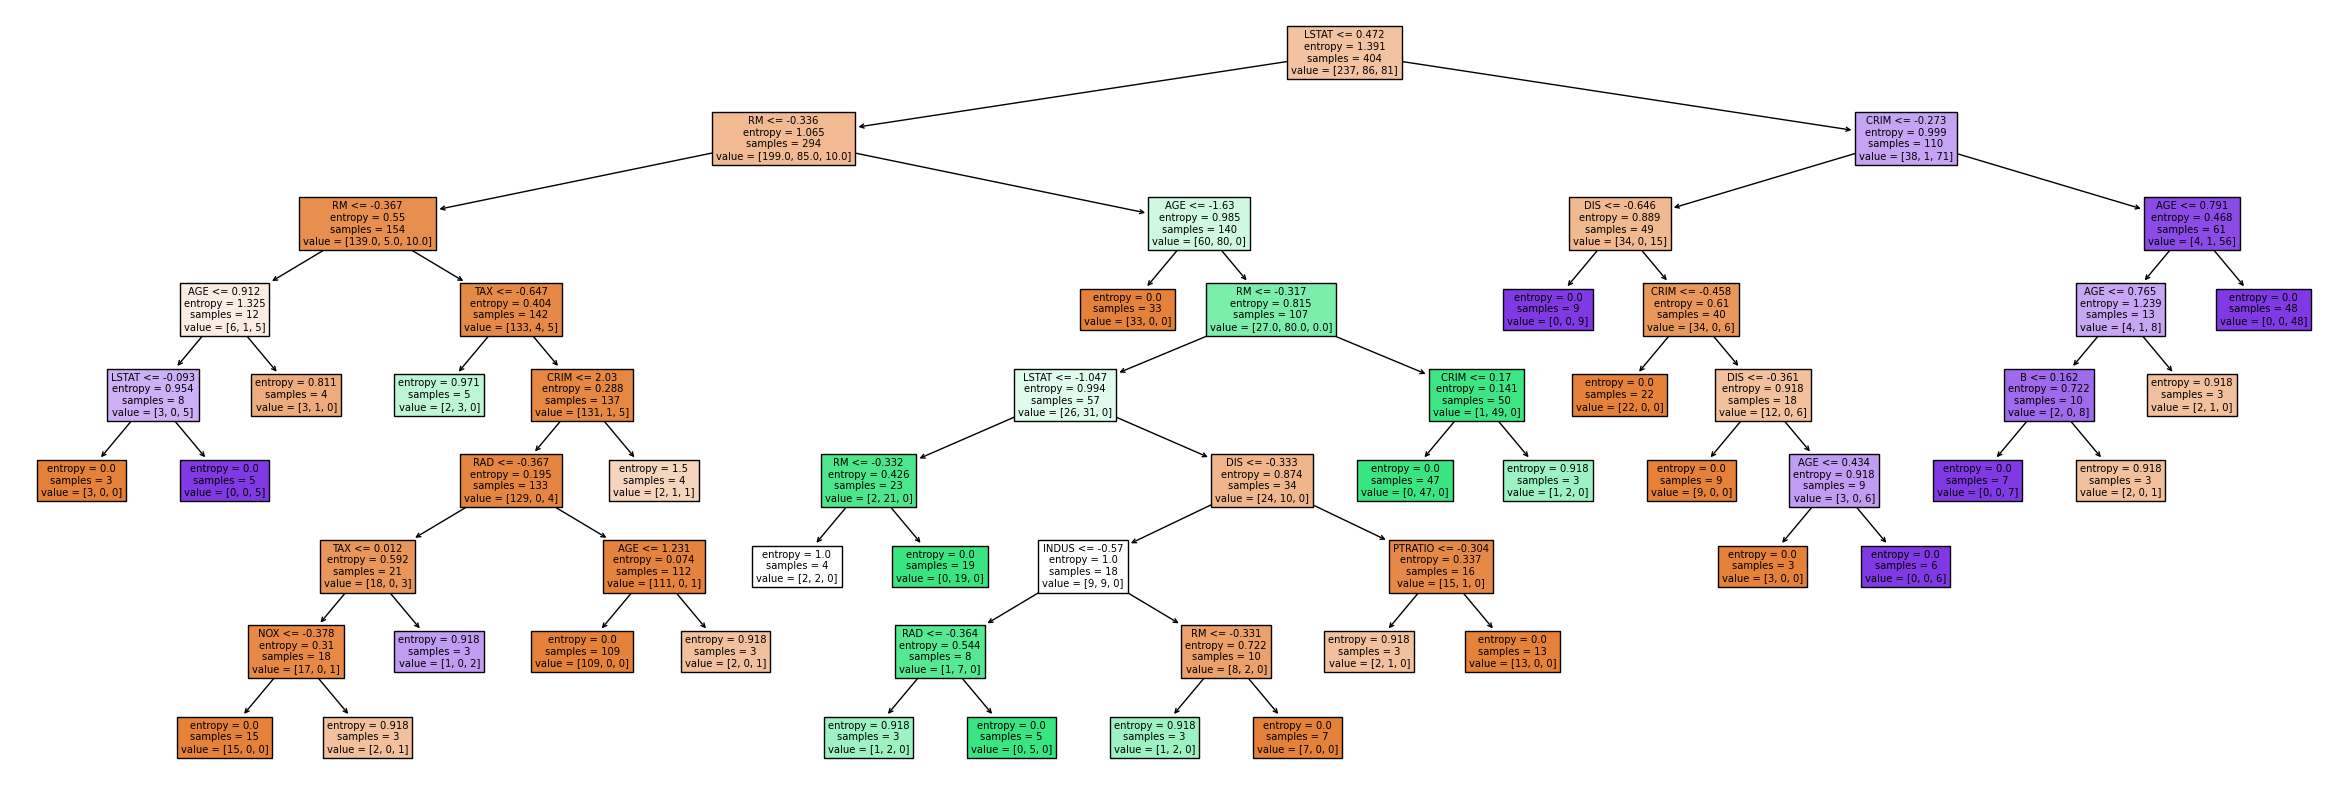

In [236]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30, 10))
plot_tree(
    DecisionTreeGridSearch.best_estimator_,
    filled=True,
    feature_names = X_train.columns.tolist(),
)
plt.show()

## Question 29:

**Underfitting** occurs when a model is too simple and is unable to capture the underlying structure of the data. Consequently, it performs poorly on the training data and does not generalize well to unseen data. Underfitting can be caused by an overly simplistic model, not enough training data, or a lack of complexity in the model to capture the signals in the data.

Signs of underfitting include:
- Low accuracy on the training data.
- The model's performance on training and validation datasets is similarly poor.
- Simplistic assumptions about the data's structure that overlook the complexities.

Strategies to combat underfitting:
- Increasing model complexity (using more features or complex model architectures).
- Using fewer features.
- Gathering more training data or constructing additional features from the existing data.
- Reducing the amount of regularization applied to the model (if any).

**Overfitting**, on the other hand, happens when a model is too complex and captures noise in the training data as if it were a real pattern. This leads to high performance on the training data but poor generalization to new, unseen data. Overfitting occurs when a model learns the details and noise in the training data to the extent that it negatively impacts the performance of the model on new data.

Signs of overfitting include:
- High accuracy on the training data, but significantly lower accuracy on validation or test data.
- The model seems to fit the training data too well, capturing noise and outliers.

Strategies to combat overfitting:
- Simplifying the model (reducing its complexity).
- Collecting more training data.
- Employing techniques such as cross-validation to get a better estimate of model performance.
- Implementing regularization techniques (like L1, L2, dropout for neural networks) that penalize overly complex models.
- Pruning the model (for decision trees) or using ensemble methods.



# **<font color="#f0e68c">Phase4: Ensemble<font>** 

## Question 30:
Ensemble methods involve combining multiple models to improve predictive performance and reduce overfitting. They are important today because they often result in more accurate and robust models compared to using a single model. By leveraging the diversity of multiple models, ensemble methods can capture different patterns in the data and make more reliable predictions. Additionally, ensemble methods are known for their ability to handle complex data and produce high-quality results across a variety of domains, making them a popular choice in machine learning and data science applications.

## Question 31:
Boosting and Bagging are ensemble methods used for classification tasks.

Bagging (Bootstrap Aggregating) involves training multiple models independently on different subsets of the training data and then averaging their predictions to make the final prediction. This helps reduce variance and overfitting by creating a diverse set of models.

Boosting, on the other hand, works by training multiple weak learners sequentially where each learner focuses on the errors made by the previous learner. This process continues until a strong predictive model is built. Boosting aims to reduce bias and improve accuracy by sequentially correcting the errors of the previous models.

The main difference between Bagging and Boosting lies in their approach to building and combining models. Bagging creates parallel models that are independent of each other, while Boosting creates sequential models that are interdependent and aim to correct each other’s errors. Additionally, Boosting tends to focus more on difficult-to-predict instances, while Bagging aims to reduce variance in the model by averaging predictions.

## Question 32:
Random Forest is an ensemble learning method used for both classification and regression tasks. It operates by constructing multiple decision trees during the training phase. Each decision tree is built on a random subset of the original dataset, using a technique called bootstrap aggregating or "bagging."
During the training process, each tree is trained on a different subset of the data, and the split points in each tree are determined by considering a random subset of the features. This random feature selection helps to decorrelate the trees and introduce diversity in the forest.
To make predictions, the Random Forest combines the predictions of all the individual trees. For classification tasks, it uses majority voting, where the class with the most votes across all the trees is selected as the final prediction. For regression tasks, it takes the average of the predicted values from all the trees.
The Random Forest algorithm has several advantages. It can handle large datasets with high dimensionality and is resistant to overfitting. It is also capable of dealing with missing data and maintaining good performance. Additionally, it provides estimates of feature importance, which can be useful for feature selection.
Overall, Random Forest is a powerful and versatile machine learning algorithm that can effectively handle a wide range of classification and regression problems.

## Question 33:
The concept of bootstrapping in Random Forest refers to the technique of creating multiple subsets of the original training data through random sampling with replacement. This means that each subset can contain duplicate instances from the original dataset.
Bootstrapping plays a crucial role in the functioning of Random Forest. When constructing each decision tree, a random subset of the original dataset is selected through bootstrapping. This subset is used as the training data for that particular tree. By creating different subsets for each tree, bootstrapping introduces diversity into the forest.
The bootstrapping process ensures that each tree is trained on a slightly different set of data, which leads to variations in the learned patterns and predictions. This diversity is beneficial because it helps to reduce overfitting and increases the generalization capability of the Random Forest.
Moreover, bootstrapping also provides a measure of the model's performance. During the construction of each tree, the remaining data that was not included in the bootstrap sample, called out-of-bag (OOB) data, can be used to evaluate the model. The OOB samples act as a validation set for each tree, allowing an estimation of the model's performance without the need for cross-validation or a separate validation set.
In summary, bootstrapping in Random Forest is the process of creating subsets of the training data through random sampling with replacement. It introduces diversity among the decision trees and allows for the estimation of model performance through out-of-bag samples.

## Question 34:
The number of decision trees in a Random Forest does have an impact on the effectiveness of the model. Generally, as the number of trees increases, the performance of the Random Forest improves, up to a certain point.
Adding more trees to the forest allows for better representation of the underlying patterns in the data and increases the robustness of the predictions. With more trees, the Random Forest can capture a wider range of features and make more accurate predictions. Additionally, having a larger number of trees helps to reduce the variance and stabilize the model's performance.
However, there is a trade-off between the number of trees and the computational cost. As the number of trees increases, so does the training time and the prediction time. Therefore, it is essential to find the right balance between model performance and computational efficiency.
The optimal number of trees in a Random Forest is typically determined through experimentation and validation. It depends on the specific dataset and problem at hand. In practice, it is common to start with a relatively large number of trees and then evaluate the model's performance on a validation set or using techniques like cross-validation. The number of trees can be adjusted based on the performance metrics until the optimal balance is achieved.
There is no fixed value for the number of trees that guarantees the best performance in all cases. However, in many scenarios, a Random Forest with hundreds or even thousands of trees can often provide satisfactory results.

## Question 35:
Random Forest is a versatile machine learning algorithm that can be applied to a wide range of problems. However, there are certain scenarios where it may not be suitable or recommended to use Random Forest.
Random Forest may not be suitable in the following situations:
Small Datasets: When the dataset is small, Random Forest may not perform as well. Random Forest requires a sufficient amount of data to build diverse and accurate decision trees. With a limited amount of data, the ensemble may not be able to capture the underlying patterns effectively, leading to overfitting or poor performance.
High-Dimensional Data: Random Forest can handle high-dimensional data to some extent, but when the number of features is significantly larger than the number of instances, it may face challenges. The curse of dimensionality can affect the performance of Random Forest in such cases, as it becomes more difficult to find meaningful patterns in the data.
Time and Resource Constraints: Random Forest can be computationally expensive, especially when dealing with a large number of trees or complex datasets. If there are strict time or resource constraints, such as real-time applications or limited computational resources, using Random Forest may not be feasible.
Random Forest is recommended in the following situations:
Classification and Regression Tasks: Random Forest is effective for both classification and regression problems. It can handle categorical and numerical features, making it suitable for a variety of tasks.
Large Datasets: Random Forest performs well on large datasets with a sufficient number of instances. It can handle a large number of samples and features without sacrificing performance.
Noisy or Missing Data: Random Forest can handle noisy data and missing values effectively. It is robust to outliers and can provide reliable predictions even in the presence of imperfect data.
Feature Importance: Random Forest provides a measure of feature importance, which can be valuable for feature selection and understanding the underlying data relationships.
Random Forest is not suitable for small datasets, high-dimensional data, or situations with time and resource constraints. However, it is recommended for classification and regression tasks, large datasets, handling noisy or missing data, and gaining insights into feature importance.

## Question 36:
The use of Random Forest has an impact on reducing the variance of a model.
Random Forest is an ensemble learning method that combines multiple decision trees. Each decision tree in the Random Forest is constructed on a random subset of the training data and a random subset of the features. By using these random subsets, Random Forest introduces diversity among the trees.
The diversity among the trees helps to reduce the variance of the model. Each individual tree in the Random Forest may have certain biases or errors due to the random subsets used for training. However, when the predictions of all the trees are combined through majority voting (for classification) or averaging (for regression), the errors tend to cancel out, resulting in a more robust and accurate prediction.
In other words, the ensemble nature of Random Forest helps to smooth out the individual tree's high-variance predictions and provides a more stable and reliable estimation. As a result, Random Forest tends to have lower variance compared to a single decision tree.
Reducing variance is particularly beneficial in situations where the model is prone to overfitting. By averaging the predictions of multiple trees, Random Forest can mitigate the overfitting problem and generalize well to unseen data.
Therefore, the use of Random Forest can help to decrease the variance of a model and improve its overall performance.

## Question 37:
The hyperparameters that I used for this model are the same as decision tree except `n_estimators` which shows how many trees we want to combine for our prediction.

In [237]:
from sklearn.ensemble import RandomForestClassifier

class RandomForestModel(ClassifierModel):    
    def create_classifier(self, params):
        return RandomForestClassifier(criterion=params['criterion'], max_depth=params["max_depth"],
                                      n_estimators=params["n_estimators"])

    def set_search_params(self):
        return {
            'n_estimators': range(20, 150, 20),
            'criterion': ['entropy', 'gini'],
            'max_depth': range(5, 10),
        }

model's train accuracy:  0.995
model's test accuracy:  0.863


Best hyperparameters: {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 80}
Best model's train accuracy score: 0.901
Best model's test score: 0.892


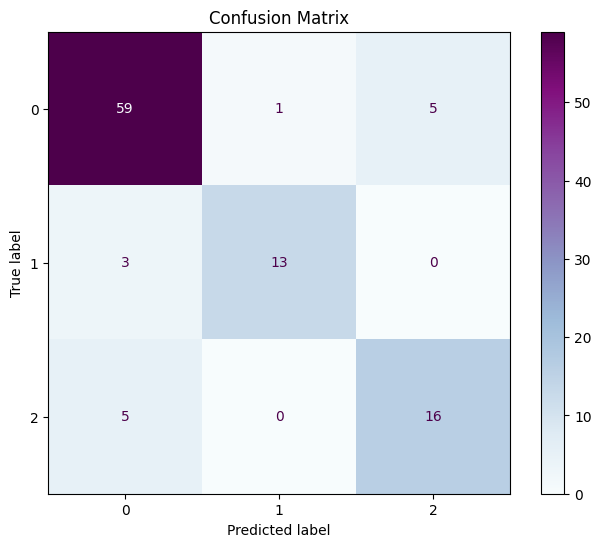

In [238]:
params = {
        'criterion': "gini",
        'max_depth': 9,
        'n_estimators': 40,
}
run_model(RandomForestModel, X_train, y_train, X_test, y_test, params)

From confusion matrix we can infer accuracy:
$$Accuracy = \frac{TP + TN}{TP + TN + FP + FN} = 90.1 \%$$
Here our model both performs well on test and train so we don't have overfitting nor underfitting.


I plotted the model's accuracy when we change `n_estimators` and `max_depth`. We can see both test and train accuracy increase as we increase these hyperparameters but after a while, test accuracy doesn't increase anymore which shows that our model is overfitting.

Text(0, 0.5, 'Accuracy')

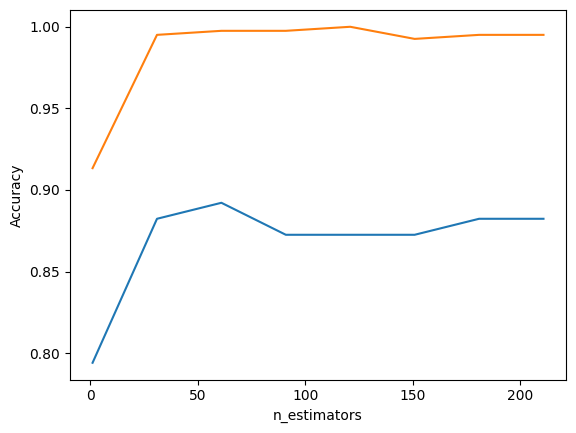

In [239]:
test_accs = []
train_accs = []
n_estimators_interval = range(1, 230, 30)
params = {
        'criterion': 'gini',
        'max_depth': 9,
        'n_estimators': 1,
}
for i in n_estimators_interval:
    params["n_estimators"] = i
    model = RandomForestModel(X_train, y_train, params)
    test_accs.append(model.calc_accuracy(X_test, y_test))
    train_accs.append(model.get_train_accuracy())
    
plt.plot(n_estimators_interval, test_accs)
plt.plot(n_estimators_interval, train_accs)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

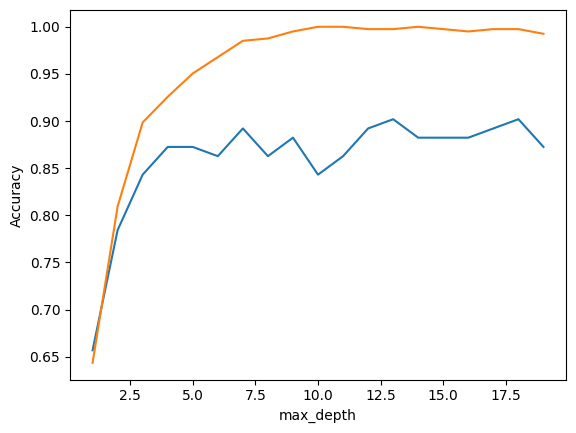

In [240]:
test_accs = []
train_accs = []
max_depth_interval = range(1, 20)
params = {
        'criterion': 'entropy',
        'max_depth': 1,
        'n_estimators': 20,
}
for i in max_depth_interval:
    params["max_depth"] = i
    model = RandomForestModel(X_train, y_train, params)
    test_accs.append(model.calc_accuracy(X_test, y_test))
    train_accs.append(model.get_train_accuracy())
plt.plot(max_depth_interval, test_accs)
plt.plot(max_depth_interval, train_accs)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

#### Bias

Bias is the difference between the average prediction of our model and the correct value which we are trying to predict. A high bias can cause an algorithm to miss the relevant relations between features and target outputs (underfitting).

#### Variance

Variance is the variability of model prediction for a given data point or a value which indicates the spread of the data. A high variance can cause overfitting: modeling the random noise in the training data, rather than the intended outputs.

Random forests are an ensemble method that combines multiple decision trees to reduce variance and improve generalization but Decision Trees have more varaince and less bias because they tend to overfit with training data. 

In [241]:
from mlxtend.evaluate import bias_variance_decomp


dt_params = {
        'criterion': "entropy",
        'max_depth': 8,
        'min_samples_split': 2,
        'min_samples_leaf': 4,
}  
 
rf_params = {
        'criterion': "gini",
        'max_depth': 9,
        'n_estimators': 20,
}

dt_model = DecisionTreeModel(X_train, y_train, dt_params)
rf_model = RandomForestModel(X_train, y_train, rf_params)

_, dt_bias, dt_var = bias_variance_decomp(dt_model.classifier,
                                                X_train.values , y_train.values,
                                                X_test.values, y_test.values,
                                                loss='mse')

_, rf_bias, rf_var = bias_variance_decomp(rf_model.classifier,
                                                X_train.values , y_train.values,
                                                X_test.values, y_test.values,
                                                loss='mse')

print(f'Decision Tree Bias:     {dt_bias:.2f}')
print(f'Decision Tree Variance: {dt_var:.2f}')
print(f'Random Forest Bias:     {rf_bias:.2f}')
print(f'Random Forest Variance: {rf_var:.2f}')

Decision Tree Bias:     0.30
Decision Tree Variance: 0.27
Random Forest Bias:     0.31
Random Forest Variance: 0.12


## Computing the Derivative

As we saw, the cost function is the sum over the data points of the squared difference between an observed output and a predicted output.

Since the derivative of a sum is the sum of the derivatives, we can compute the derivative for a single data point and then sum over data points. We can write the squared difference between the observed output and predicted output for a single point as follows:

$$
(output  - (const* w _{0} + [feature_1] * w_{1} + ...+ [feature_n] * w_{n}  ))^2
$$

With n feautures and a const , So the derivative will be :


$$
2 * (output  - (const* w _{0} + [feature_1] * w_{1} + ...+ [feature_n] * w_{n}  ))
$$

The term inside the paranethesis is just the error (difference between prediction and output). So we can re-write this as:

$$2 * error*[feature_i] $$


That is, the derivative for the weight for feature i is the sum (over data points) of 2 times the product of the error and the feature itself. In the case of the constant then this is just twice the sum of the errors!

Recall that twice the sum of the product of two vectors is just twice the dot product of the two vectors. Therefore the derivative for the weight for feature_i is just two times the dot product between the values of feature_i and the current errors.


With this in mind, complete the following derivative function which computes the derivative of the weight given the value of the feature (over all data points) and the errors (over all data points).


In [242]:
def feature_derivative(errors, feature):
  #TO DO
  pass

## Gradiant Boosting and XGBoost

## Question 38:
Gradient boosting is a popular machine learning technique for building predictive models. It involves combining multiple weak models, typically decision trees, to create a strong ensemble model. The basic idea is to fit a sequence of simple models to the residuals of the previous model, with the objective of minimizing a loss function. This process continues until a stopping criterion is met, such as a maximum number of iterations or a minimum improvement in the loss function.

XGBoost (Extreme Gradient Boosting) is a specific implementation of gradient boosting that is designed to be efficient, scalable, and highly accurate. It uses a combination of techniques, such as parallel processing, tree pruning, and regularization, to optimize the training process and improve the performance of the model.

## Question 39:
Boosting Tree and Decision Tree are both machine learning algorithms, but they differ in their approach and functionality.

- Decision Tree:
A Decision Tree is a standalone algorithm that builds a tree-like model to make predictions. It recursively partitions the data based on a set of features, creating a tree structure where each internal node represents a decision based on a feature, and each leaf node represents a predicted outcome or class label. Decision Trees are typically built using a top-down, greedy approach, where each split is chosen to maximize information gain or minimize impurity. Decision Trees are relatively simple and interpretable, but they can suffer from high variance and may overfit the training data.

- Boosting Tree:
Boosting Tree, on the other hand, is an ensemble learning method that combines multiple weak learners, often in the form of Decision Trees, to create a strong predictive model. It works iteratively by sequentially adding weak learners to the ensemble, with each subsequent learner focusing on the instances that were misclassified by the previous learners. The weak learners are usually shallow Decision Trees, called "stumps," which are simple and fast to train. Boosting algorithms, such as AdaBoost and Gradient Boosting, assign weights to the training instances to emphasize the importance of difficult or misclassified examples during each iteration. The final prediction is made by aggregating the predictions of all the weak learners. Boosting Tree algorithms are effective at reducing bias and improving overall predictive performance. They are robust and less prone to overfitting compared to individual Decision Trees.

So the main difference between Boosting Tree and Decision Tree lies in their approach and functionality. Decision Tree is a standalone algorithm that constructs a single tree-based model, while Boosting Tree is an ensemble method that combines multiple weak learners, often Decision Trees, to create a powerful predictive model. Boosting Tree algorithms address the limitations of Decision Trees by reducing bias, improving accuracy, and providing better generalization capabilities.

## Question 39:

In [243]:
from xgboost import XGBClassifier

class XGBModel(ClassifierModel):    
    def create_classifier(self, params):
        return XGBClassifier(gamma=1, learning_rate=params["learning_rate"], max_depth=params["max_depth"]
                             , n_estimators=params["n_estimators"])

    def set_search_params(self):
        return {
            'learning_rate': np.arange(0.1, 0.9, 0.05),
            'max_depth': range(5, 10),
            'n_estimators': range(1, 120, 20)
        }


model's train accuracy:  0.983
model's test accuracy:  0.873
Best hyperparameters: {'learning_rate': 0.45000000000000007, 'max_depth': 8, 'n_estimators': 21}
Best model's train accuracy score: 0.881
Best model's test score: 0.863


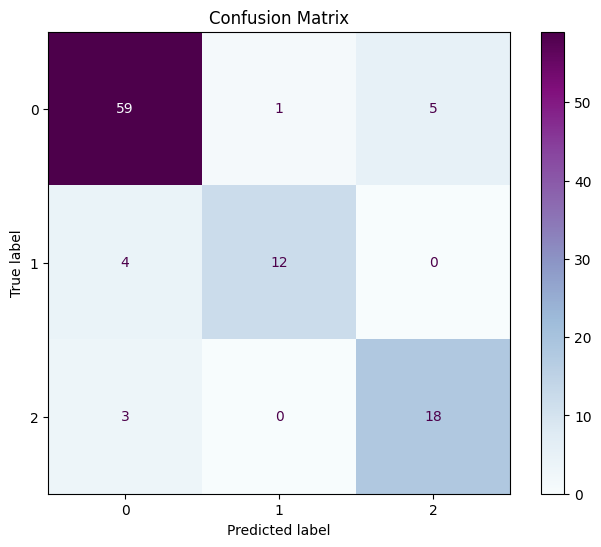

In [244]:
params = {
    "learning_rate" : 0.1,
    "max_depth" : 8,
    "n_estimators": 50
}
run_model(XGBModel, X_train, y_train, X_test, y_test, params)

From confusion matrix we can infer accuracy:
$$Accuracy = \frac{TP + TN}{TP + TN + FP + FN} = 91.4 \%$$
Here our model both performs well on test and train so we don't have overfitting nor underfitting.




# **<font color="#f0e68c">Phase5: Support Vector Machine<font>** 

## Question 40:

### 1 & 2.

In [245]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report 

X = dataSet.drop(["MEDV","House_Category"], axis="columns") 
y = dataSet["House_Category"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rbf_classifier = svm.SVC(kernel='rbf')
rbf_classifier.fit(X_train, y_train)
rbf_predictions = rbf_classifier.predict(X_test)

report = classification_report(y_test, rbf_predictions, zero_division=0, output_dict=True)
df = pd.DataFrame(report)
print(df)


rbf_conf_matrix = confusion_matrix(y_test, rbf_predictions)
print("\nConfusion Matrix (RBF kernel):\n", rbf_conf_matrix)


linear_classifier = svm.SVC(kernel='linear')
linear_classifier.fit(X_train, y_train)
linear_predictions = linear_classifier.predict(X_test)

report2 = classification_report(y_test, linear_predictions, zero_division=0, output_dict=True)
df2 = pd.DataFrame(report2)
print(df2)


linear_conf_matrix = confusion_matrix(y_test, linear_predictions)
print("\nConfusion Matrix (Linear kernel):\n", linear_conf_matrix)



                   0          1          2  accuracy   macro avg  weighted avg
precision   0.845070   0.846154   0.777778  0.833333    0.823001      0.831386
recall      0.923077   0.687500   0.666667  0.833333    0.759081      0.833333
f1-score    0.882353   0.758621   0.717949  0.833333    0.786307      0.829096
support    65.000000  16.000000  21.000000  0.833333  102.000000    102.000000

Confusion Matrix (RBF kernel):
 [[60  2  3]
 [ 4 11  1]
 [ 7  0 14]]
                   0          1          2  accuracy   macro avg  weighted avg
precision   0.859375   0.866667   0.652174  0.813725    0.792739      0.817860
recall      0.846154   0.812500   0.714286  0.813725    0.790980      0.813725
f1-score    0.852713   0.838710   0.681818  0.813725    0.791080      0.815332
support    65.000000  16.000000  21.000000  0.813725  102.000000    102.000000

Confusion Matrix (Linear kernel):
 [[55  2  8]
 [ 3 13  0]
 [ 6  0 15]]


Sure, let's analyze the classification reports and confusion matrices for both the RBF and Linear kernels.

### Analysis of RBF Kernel:

- **Precision**: Precision measures the ratio of correctly predicted positive observations to the total predicted positives. For class 0, it's 84.51%, for class 1, it's 84.62%, and for class 2, it's 77.78%.

- **Recall**: Recall measures the ratio of correctly predicted positive observations to the all observations in actual class. For class 0, it's 92.31%, for class 1, it's 68.75%, and for class 2, it's 66.67%.

- **F1-score**: F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. For class 0, it's 88.24%, for class 1, it's 75.86%, and for class 2, it's 71.79%.

- **Support**: Support represents the number of actual occurrences of the class in the specified dataset. For class 0, there are 65 occurrences, for class 1, there are 16 occurrences, and for class 2, there are 21 occurrences.

- **Confusion Matrix**: The confusion matrix shows the number of true positive, true negative, false positive, and false negative predictions. For example, in the first row, first column, there are 60 true positives, in the second row, first column, there are 4 false positives, and so on.

### Analysis of Linear Kernel:

- **Precision**: For class 0, it's 85.94%, for class 1, it's 86.67%, and for class 2, it's 65.22%.

- **Recall**: For class 0, it's 84.62%, for class 1, it's 81.25%, and for class 2, it's 71.43%.

- **F1-score**: For class 0, it's 85.27%, for class 1, it's 83.71%, and for class 2, it's 68.18%.

- **Support**: The support values are the same as in the RBF kernel.

- **Confusion Matrix**: The confusion matrix shows similar information as for the RBF kernel, but the values differ due to the different classification performance of the Linear kernel.

### Overall Analysis:

- The RBF kernel seems to perform better in terms of precision and recall for class 0 and class 1, while the Linear kernel performs better for class 2.
- F1-score provides a balanced view of precision and recall, and overall, both kernels perform similarly.
- It would be best to consider the specific requirements and characteristics of your dataset to determine which kernel performs better for your task.


### 3.
The choice between Grid Search and Random Search depends on the specific characteristics of the problem and the available computational resources.

- Grid Search:

Grid Search is a hyperparameter optimization technique where a predefined set of hyperparameter values is exhaustively searched. It creates a grid of all possible combinations of hyperparameters and evaluates each combination using cross-validation or a separate validation set. Grid Search is suitable when you have a relatively small number of hyperparameters and their values can be explicitly defined. It ensures that all possible combinations are explored, but it can be computationally expensive, especially when the hyperparameter search space is large. Grid Search is recommended when the number of hyperparameters is limited and computational resources are sufficient.

- Random Search:

Random Search, on the other hand, randomly samples hyperparameter combinations from a defined search space. Instead of exhaustively searching all possible combinations, Random Search explores a subset of combinations. This approach is advantageous when the hyperparameter search space is large and it is not feasible to explore all combinations. Random Search has the flexibility to focus on promising areas of the search space, potentially leading to good results with fewer iterations compared to Grid Search. It is also less computationally demanding than Grid Search since it samples a subset of combinations. Random Search is recommended when the hyperparameter search space is large, computational resources are limited, or when there is no prior knowledge about the optimal hyperparameter values.

So, if you have a small number of hyperparameters and computational resources are sufficient, Grid Search can be a good choice as it exhaustively explores all possible combinations. On the other hand, if the hyperparameter search space is large or computational resources are limited, Random Search can be a more practical option as it explores a subset of combinations randomly.

### 4.

In [246]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.svm import SVC

X = dataSet.drop(["MEDV","House_Category"], axis="columns") 
y = dataSet["House_Category"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'kernel': ['rbf', 'linear'],
}

random_search = RandomizedSearchCV(SVC(), param_distributions=param_grid, n_iter=10, cv=5)
random_search.fit(X_train, y_train)

print("Random Search - Best Estimator:")
print(random_search.best_estimator_)
print("Random Search - Best Hyperparameters:")
print(random_search.best_params_)
print()

grid_search = GridSearchCV(SVC(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Grid Search - Best Estimator:")
print(grid_search.best_estimator_)
print("Grid Search - Best Hyperparameters:")
print(grid_search.best_params_)

Random Search - Best Estimator:
SVC()
Random Search - Best Hyperparameters:
{'kernel': 'rbf'}



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Grid Search - Best Estimator:
SVC()
Grid Search - Best Hyperparameters:
{'kernel': 'rbf'}


# **<font color="#f0e68c">Phase6: Evaluate Models<font>** 

In [249]:
from sklearn.metrics import confusion_matrix, recall_score, f1_score, precision_score, accuracy_score
from sklearn.model_selection import train_test_split

class ModelEvaluator:
    def __init__(self, models):
        self.models = models

    def run(self, X_test, y_test):
        results = {}
        for name, model in self.models.items():
            model.fit(X_train, y_train)
            predictions = model.predict(X_test)
            results[name] = self.calculate_metrics(y_test, predictions)
        return results

    def calculate_metrics(self, true_labels, predicted_labels):
        metrics = {}
        
        metrics['confusion_matrix'] = confusion_matrix(true_labels, predicted_labels)

        metrics['recall'] = recall_score(true_labels, predicted_labels, average='weighted')

        metrics['f1_score'] = f1_score(true_labels, predicted_labels, average='weighted')

        metrics['precision'] = precision_score(true_labels, predicted_labels, average='weighted')

        metrics['accuracy'] = accuracy_score(true_labels, predicted_labels)

        for average_method in ['macro', 'micro', 'weighted']:
            metrics[f'{average_method}_recall'] = recall_score(true_labels, predicted_labels, average=average_method)
            metrics[f'{average_method}_precision'] = precision_score(true_labels, predicted_labels, average=average_method)
            metrics[f'{average_method}_f1_score'] = f1_score(true_labels, predicted_labels, average=average_method)

        return metrics



In [257]:
params = {
        'criterion': "gini",
        'max_depth': 9,
        'n_estimators': 40,
}

X = dataSet.drop(["MEDV","House_Category"], axis="columns") 
y = dataSet["House_Category"] 

models_dict = {
    'Random Forest': RandomForestClassifier(criterion=params['criterion'], max_depth=params["max_depth"], n_estimators=params["n_estimators"]),
    'Support Vector Machine': SVC(kernel='linear', random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'XGBoost': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

evaluator = ModelEvaluator(models_dict)

evaluation_results = evaluator.run(X_test, y_test)

for model_name, metrics in evaluation_results.items():
    print(f"Metrics for {model_name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")
    print()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Metrics for Random Forest:
confusion_matrix: [[60  1  4]
 [ 3 13  0]
 [ 4  0 17]]
recall: 0.8823529411764706
f1_score: 0.8819370172311348
precision: 0.8830009615786614
accuracy: 0.8823529411764706
macro_recall: 0.8483669108669109
macro_precision: 0.8778725420516466
macro_f1_score: 0.8617604617604618
micro_recall: 0.8823529411764706
micro_precision: 0.8823529411764706
micro_f1_score: 0.8823529411764706
weighted_recall: 0.8823529411764706
weighted_precision: 0.8830009615786614
weighted_f1_score: 0.8819370172311348

Metrics for Support Vector Machine:
confusion_matrix: [[55  2  8]
 [ 3 13  0]
 [ 6  0 15]]
recall: 0.8137254901960784
f1_score: 0.8153322867258703
precision: 0.8178597435350953
accuracy: 0.8137254901960784
macro_recall: 0.7909798534798536
macro_precision: 0.7927385265700483
macro_f1_score: 0.7910803458440366
micro_recall: 0.8137254901960784
micro_precision: 0.8137254901960784
micro_f1_score: 0.8137254901960784
weighted_recall: 0.8137254901960784
weighted_precision: 0.817859743

## Gradient Descent

Now we will write a function that performs a gradient descent. The basic premise is simple. Given a starting point we update the current weights by moving in the negative gradient direction. Recall that the gradient is the direction of increase and therefore the negative gradient is the direction of decrease and we're trying to minimize a cost function.


The amount by which we move in the negative gradient direction is called the 'step size'. We stop when we are 'sufficiently close' to the optimum. We define this by requiring that the magnitude (length) of the gradient vector to be smaller than a fixed 'tolerance'.


With this in mind, complete the following gradient descent function below using your derivative function above. For each step in the gradient descent we update the weight for each feature befofe computing our stopping criteria.

In [ ]:
# Utility functions for multiple regression

def normalize_features(chosen_features, data_frame):
    for feature in chosen_features:
        data_frame[feature] = (data_frame[feature] - data_frame[feature].mean()) / data_frame[feature].std()
    return data_frame

def predict_output(feature_matrix, weights, bias):
    #TO DO FOR POLYNOMIAL REGRESSION PREDICTION
    return predictions



## Polynomial Regression Using Gradient Descent

Polynomial regression using gradient descent involves finding the optimal parameters for a polynomial model by iteratively updating them based on the gradient of a loss function, typically the Mean Squared Error (MSE). The steps involved are as follows:

- **Step 1: Define the polynomial model**
The polynomial model has the form:
$$f(x) = \beta_0 + \beta_1x + \beta_2x^2 + \ldots + \beta_nx^n$$

- **Step 2: Define the loss function**
The loss function, such as Mean Squared Error (MSE), measures the error between the actual target values and the predicted values by the model.

- **Step 3: Initialize the coefficients**
Start with initial guesses for the coefficients $\beta_0, \beta_1, \ldots, \beta_n$

- **Step 4: Update the coefficients using Gradient Descent**
Iteratively update the coefficients to minimize the loss function. This is done by computing the gradient of the loss function with respect to each coefficient and making small adjustments in the opposite direction of the gradient.

- **Step 5: Repeat until convergence**
Continue updating the coefficients iteratively until the algorithm converges to the optimal values.

- **Step 6: Use the learned coefficients for prediction**
Once the coefficients converge, they can be used in the polynomial function to make predictions on new data points.

Overall, polynomial regression using gradient descent is an iterative optimization process that aims to find the best-fitting polynomial curve to the data points by minimizing the prediction errors. The learning rate and the number of iterations are key hyperparameters to tune for efficient convergence and accurate modeling.



In [ ]:
def polynomial_regression_gradient_descent(feature_matrix, outputs, initial_weights,bias, step_size, tolerance):
    weights = np.array(initial_weights)

    while True:
        # Compute predictions using polynomial function and errors
        #TO DO

        # Compute derivatives for all weights
        #TO DO

        # Update weights and bias
        #TO DO

        # Check convergence
        #TO DO

        return weights, bias

In [ ]:

def run_polynomial_regression(chosen_feature_matrix, target_matrix, keywords):
    initial_weights = keywords['initial_weights']
    step_size = keywords['step_size']
    tolerance = keywords['tolerance']
    bias = keywords['bias']
    weights = np.array(initial_weights)
    weights, bias = polynomial_regression_gradient_descent(chosen_feature_matrix, target_matrix, weights, bias, step_size, tolerance)

    return weights, bias

def get_weights_and_bias(chosen_features):

    keywords = {
        'initial_weights': np.array([.5]*len(chosen_features)),
        'step_size': 1.e-4,
        'tolerance': 1.e-10,
        'bias': 0
    }

    # TO DO

    return chosen_feature_matrix, train_weights, bias